# **1 - Perkenalanan**

Nama. : Josua Yerico

Batch : FTDS-001-Hck

Dataset : bigquery-public-data.ml_datasets.credit_card_default

Objective : Pembuatan model Classification untuk memprediksi default_payment_next_month menggunakan dataset credit_card_default

# **2 - Import Libaries**

In [81]:
# Define libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from sklearn.metrics import plot_confusion_matrix
import pickle

!pip install imblearn
from imblearn.over_sampling import SMOTE

#for feature encoding
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

#Calculate the variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Split between Train-Set and Test-Set
from sklearn.model_selection import train_test_split

#Handling outlier
!pip install feature-engine
from feature_engine.outliers import Winsorizer

#for feature scalling
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler 

#For Classification Problem
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier


#Spil Dataset and Standarize the Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Evaluate clasification Models
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

#for Hyperparameter
from sklearn.model_selection import GridSearchCV

#for correlation test with heatmap method
!pip install phik
import phik

# **3 - Data Loading**

Pada kasus ini data diambil dari bigquery-public-data.ml_datasets.credit_card_default dan berikut adalah proses pengambilan data tersebut:

select 
limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month
from
`bigquery-public-data.ml_datasets.credit_card_default`
limit 2965;

Berikut merupakan dataset 'Credit Card Default':

In [3]:
# Load Dataset to notebook
data = pd.read_csv('h8dsft_P1M1_Josua-Yerico.csv')
data

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,...,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,...,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,...,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,...,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2961,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2962,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1


In [4]:
#Duplicate dataframe
data_copy = data.copy()

Berikut merupakan data teratas dari dataset tersebut:

In [5]:
data.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,...,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,...,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,...,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,...,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0


Berikut merupakan data terbawah dari dataset tersebut:

In [6]:
data.tail()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2961,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2962,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1
2964,20000.0,2,1,2,24.0,-1.0,-1.0,-2.0,-2.0,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


## Check Mising Value pada target dan feature

Berikut merupakan informasi dari dataset tersebut:

In [7]:
#Check 1: check data type and mising value in dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   int64  
 10  pay_6                       2965 non-null   int64  
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

Berdasrkan informasi tersebut tidak terlihat adanya missing value dari dataset tersebut. untuk memastikan hal tersebut, perlu dilakukan pengecekkan mising value melalui nilai Q3, dan maximun  pada masing - masing kolom

In [8]:
#Check 2: make sure mising value with max, min, Q1, Q2, and Q3 in dataset 
data.describe()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
count,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,...,2965.000000,2965.000000,2965.000000,2965.000000,2.965000e+03,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000
mean,163369.308600,1.607757,1.849578,1.559865,35.193255,0.005059,-0.122428,-0.141653,-0.185160,-0.225295,...,44089.683305,40956.080607,39773.072513,6348.902867,6.272494e+03,5150.497133,4561.376054,4913.286678,5382.701518,0.214165
std,125030.415472,0.488333,0.778184,0.522317,9.109439,1.114395,1.180784,1.183630,1.178322,1.159003,...,61907.454056,58271.904751,57303.488981,20885.735336,2.887967e+04,14287.079982,13281.499599,16734.340778,17275.953029,0.410311
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2582.000000,1958.000000,1430.000000,1013.000000,9.900000e+02,477.000000,313.000000,323.000000,173.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19894.000000,18814.000000,18508.000000,2234.000000,2.175000e+03,1994.000000,1600.000000,1646.000000,1615.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58622.000000,53373.000000,52287.000000,5087.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4081.000000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,...,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000,1.000000


Berdasarkan informasi diatas didapat bahwa tidak ada mising value pada dataset tersebut. hal ini dikarenakan tidak ada nilai maximun yang lebih kecil dari nilai Q3 dari masing - masing kolom tersebut. selain itu tidak ada nilai anomali atau tidak wajar pada dataset tersebut. oleh karena itu, pada kasus ini tidak dilakukan handling mising value.

## Check Duplicates data pada feature dan target

In [9]:
#Check 3: Data Duplicate
data_final = data.drop_duplicates().reset_index(drop=True)
data_final

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,...,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,...,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,...,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,...,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2959,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2960,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2961,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2962,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1


Berdasarkan informasi tersebut didapat bahwa dataset tersebut telah bebas dari data - data yang bersifat duplicate. 

## Replace kolom pay_0, pay_2, pay_3, pay_4, pay_5, pay_6

dikarenakan kolom pay_0, pay_2, pay_3, pay_4, pay_5, dan pay_6 merupakan status pembayaran kartu kredit, maka akan dilakukan replacement menjadi data categorical untuk mendapatkan hasil prediksi yang maksimal. selain itu, default payment kartu kredit akan menjadi 1 jika customer melakukan tunggakan minimal 1 bulan. oleh karena itu, label status dapat direduksi menjadi completed bagi customer yang membayar cicilan tetap waktu, minimun payment bagi customer yang membayar minimun cicilan aja dan late pay bagi customer yang melakuka tunggakan.

In [10]:
data_final['pay_0'].unique()

array([ 0., -1.,  2.,  1.,  3., -2.,  4.,  5.,  6.,  7.,  8.])

In [11]:
data_final['pay_0'] = data_final['pay_0'].replace({0:'completed', -1: 'completed', -2:'minimun payment', 1:'late pay', 2:'late pay', 3:'late pay', 4:'late pay', 5:'late pay', 6:'late pay', 7:'late pay', 8:'late pay'})
data_final['pay_2'] = data_final['pay_2'].replace({0:'completed', -1: 'completed', -2:'minimun payment', 1:'late pay', 2:'late pay', 3:'late pay', 4:'late pay', 5:'late pay', 6:'late pay', 7:'late pay', 8:'late pay'})
data_final['pay_3'] = data_final['pay_3'].replace({0:'completed', -1: 'completed', -2:'minimiun payment', 1:'late pay', 2:'late pay', 3:'late pay', 4:'late pay', 5:'late pay', 6:'late pay', 7:'late pay', 8:'late pay'})
data_final['pay_4'] = data_final['pay_4'].replace({0:'completed', -1: 'completed', -2:'minimun payment', 1:'late pay', 2:'late pay', 3:'late pay', 4:'late pay', 5:'late pay', 6:'late pay', 7:'late pay', 8:'late pay'})
data_final['pay_5'] = data_final['pay_5'].replace({0:'completed', -1: 'completed', -2:'minimun payment', 1:'late pay', 2:'late pay', 3:'late pay', 4:'late pay', 5:'late pay', 6:'late pay', 7:'late pay', 8:'late pay'})
data_final['pay_6'] = data_final['pay_6'].replace({0:'completed', -1: 'completed', -2:'minimun payment', 1:'late pay', 2:'late pay', 3:'late pay', 4:'late pay', 5:'late pay', 6:'late pay', 7:'late pay', 8:'late pay'})
data_final

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,completed,completed,completed,completed,completed,...,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,completed,completed,completed,completed,completed,...,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,completed,completed,completed,late pay,completed,...,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,completed,completed,completed,completed,completed,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,completed,completed,completed,completed,completed,...,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2959,210000.0,2,2,1,39.0,completed,completed,completed,completed,minimun payment,...,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2960,280000.0,2,1,1,41.0,late pay,completed,completed,completed,minimun payment,...,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2961,80000.0,1,1,2,28.0,late pay,completed,completed,completed,minimun payment,...,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2962,200000.0,1,2,1,53.0,late pay,completed,completed,minimun payment,minimun payment,...,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1


# **4 - Exploratory Data Analysis (EDA)**

pada kasus ini akan dibuat sebuah model untuk memprediksi apakah seseorang customer perlu di default kartu kredit atau tidak? hal tersebut  dapat dipengaruhi oleh beberapa hal, yaitu: total bill yang melebihi limit kartu kredit membuat pihak perusahan harus mendefault kartu kredit customer, limit balance dari setiap kartu kredit customer, dan status pembayaran cicilan kartu kredit customer juga dapat membuat kartu kredit customer tersebut harus didefault, serta usia yang tidak produktif lagi dapat membuat pihak kartu kredit tidak dapat membayar kartu kredit. untuk membuktikan hubungan tersebut terhadap default payment seseorang diperlukan analisis data melalui visualisasi data.

sebelum melakukan visualisasi perlu dilakukan pemisahan 10 sample dari dataset sebagai data baru untuk mengetahui apakah model tersebut akurat dalam memprediksi masalah tersebut

## Get Data for Model Inference

Berikut merupakan 10 sample data secara random dari dataset tersebut:

In [12]:
# Get Data for Model Inference
data_inf = data_final.sample(10, random_state=17)

# Remove Inference-Set from Dataset
data_train_test = data_final.drop(data_inf.index)

# Reset Index 
data_train_test.reset_index(drop=True, inplace=True) 
data_inf.reset_index(drop=True, inplace=True)
data_inf

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,420000.0,2,2,2,32.0,completed,completed,completed,completed,completed,...,198925.0,175684.0,164037.0,7300.0,8839.0,8000.0,5900.0,6000.0,6000.0,0
1,30000.0,2,2,2,25.0,late pay,completed,completed,completed,completed,...,12473.0,12623.0,27460.0,1200.0,1201.0,592.0,500.0,1500.0,0.0,1
2,40000.0,2,3,1,60.0,completed,completed,completed,completed,completed,...,21058.0,8204.0,9899.0,2000.0,3000.0,3000.0,6000.0,2000.0,2000.0,0
3,110000.0,1,1,2,34.0,completed,completed,late pay,completed,completed,...,3420.0,4309.0,733.0,4013.0,2.0,3430.0,4319.0,2.0,1905.0,0
4,60000.0,2,2,2,24.0,completed,completed,completed,completed,completed,...,10213.0,10000.0,11832.0,1020.0,9479.0,1000.0,200.0,1832.0,5889.0,0
5,300000.0,2,1,1,30.0,completed,completed,completed,completed,completed,...,76244.0,67747.0,70389.0,3000.0,5000.0,2500.0,2500.0,3500.0,87000.0,1
6,70000.0,2,1,1,36.0,late pay,late pay,late pay,completed,completed,...,20021.0,22175.0,21680.0,2000.0,0.0,1339.0,2493.0,0.0,792.0,1
7,490000.0,2,2,1,30.0,completed,completed,completed,completed,completed,...,16995.0,-1527.0,62491.0,2003.0,2041.0,1092.0,4.0,64895.0,3003.0,0
8,150000.0,2,2,1,50.0,minimun payment,minimun payment,minimiun payment,minimun payment,minimun payment,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9,290000.0,1,2,1,43.0,completed,completed,late pay,completed,completed,...,3710.0,3848.0,4285.0,1930.0,0.0,2000.0,200.0,500.0,0.0,0


## Visualisasi Data

pada bagian akan diperlihatkan data mengenai hal - hal tersebut:
1. rata rata usia berapa customer yang mengalami default kartu kreditnya.
2. pengaruh bill total dengan default payment.
3. pengaruh limit balance dengan default payment.
4. pengaruh status pembayaran dengan default payment.

## rata rata usia berapa customer yang mengalami default kartu kreditnya

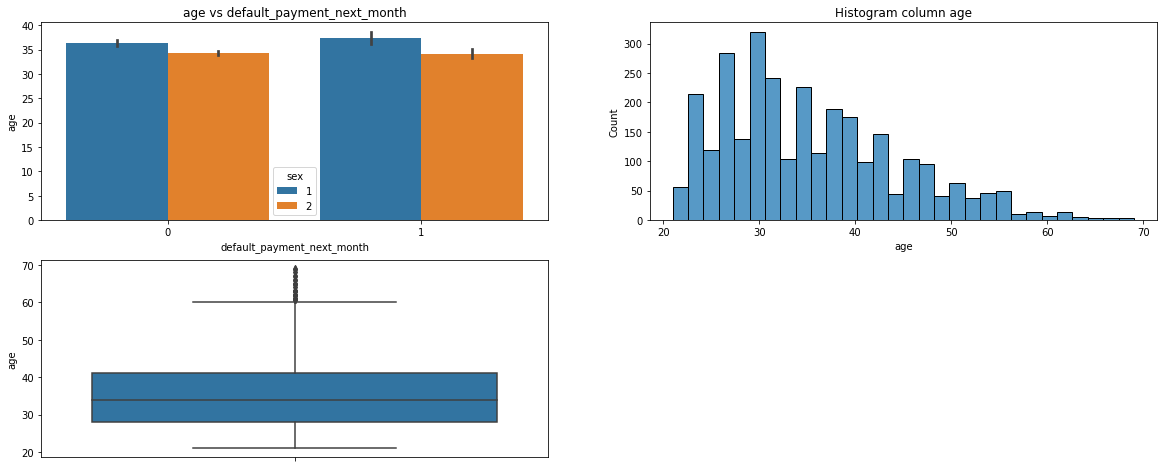

In [13]:
#Create visualisation for feature age
from statistics import mean


plt.figure(figsize=(20, 8))
plt.subplot(2,2,1)
sns.barplot(data=data, x = 'default_payment_next_month', y = 'age', estimator=mean, hue='sex')
plt.title('age vs default_payment_next_month')

plt.subplot(2, 2, 2)
sns.histplot(data['age'], bins=30)
plt.title('Histogram column age')

plt.subplot(2, 2, 3)
sns.boxplot(y= data['age'])


plt.show()

Berdasarkan grafik tersebut didapat bahwa pada umumnya kartu kredit yang di default oleh perusahan kartu kredit merupakan customer yang memiliki usia sekitar 40 tahun dan berjenis kelamin laki - laki. hal ini dikarenakan laki - laki pada rentang usia tersebut merupakan usia yang tidak terlalu produktif, memiliki tanggung jawab, dan membuka usaha sendiri. selain itu, pada umumnya usia tersebut banyak yang mengalami kesusahan dalam hal keuangan.

## Bill_amt_1 VS default_payment_next_month

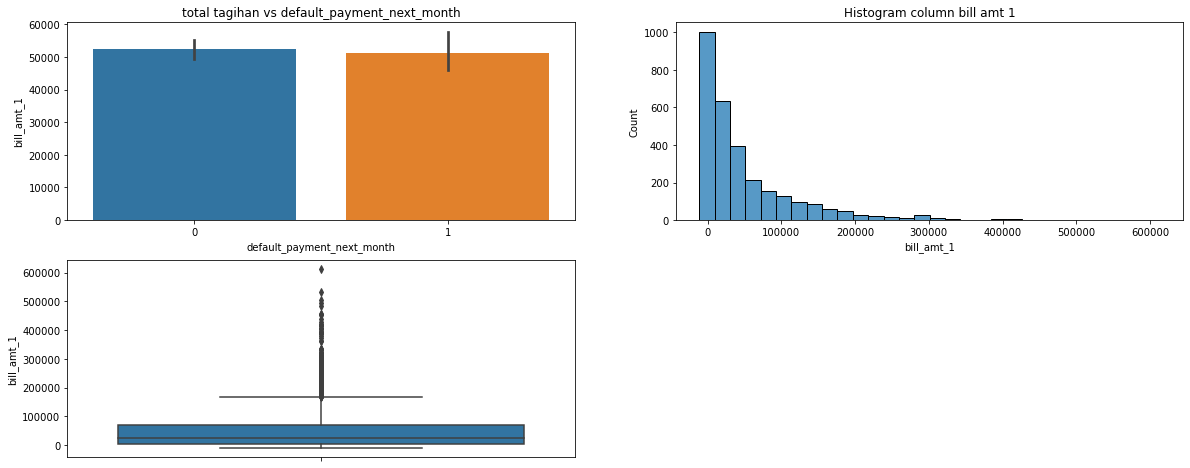

In [14]:
#Create visualisation for feature age
from statistics import mean


plt.figure(figsize=(20, 8))
plt.subplot(2,2,1)
sns.barplot(data=data, x = 'default_payment_next_month', y = 'bill_amt_1', estimator=mean)
plt.title('total tagihan vs default_payment_next_month')

plt.subplot(2, 2, 2)
sns.histplot(data['bill_amt_1'], bins=30)
plt.title('Histogram column bill amt 1')

plt.subplot(2, 2, 3)
sns.boxplot(y= data['bill_amt_1'])


plt.show()

bill amt 1 merupakan total tagihan dari bulan sebelumnya (april - agustus) yang belum dibayar ditambah tagihan bulan ini (september). hal ini didapat dari informasi sumber dataset tersebut yaitu biqguery. oleh karena itu, bill amt 1 di pakai untuk melihat hubungan antara total tagihan dengan default payment. Berdasarkan grafik tersebut didapat bahwa total tagihan seorang customer tidak berpengaruh pada kartu kredit di blokir atau tidak. jika seorang customer memili total tagihan yang besar dan customer tersebut rajin membayar cicilan per bulan, maka kartu kredit customer tersebut tidak didefault oleh perusahaan. akan tetapi, jika customer memiliki tagihan yang sedikit  tapi customer tersebut tidak membayar cicilan per bulan, maka customer tersebut akan didefault kartu kreditnya oleh perusahan.

## limit_balance VS default_payment_next_month

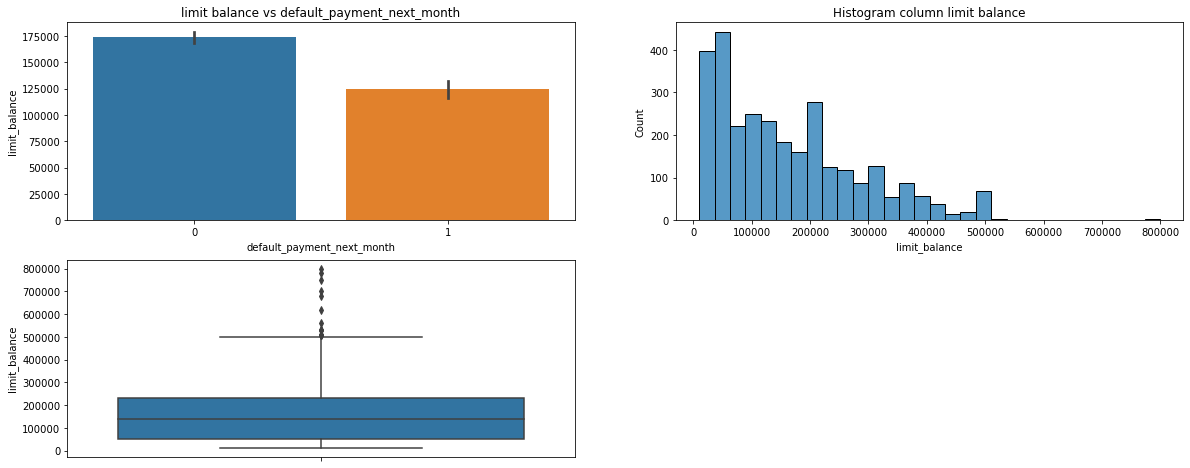

In [15]:
#Create visualisation for feature age
from statistics import mean


plt.figure(figsize=(20, 8))
plt.subplot(2,2,1)
sns.barplot(data=data, x = 'default_payment_next_month', y = 'limit_balance', estimator=mean)
plt.title('limit balance vs default_payment_next_month')

plt.subplot(2, 2, 2)
sns.histplot(data['limit_balance'], bins=30)
plt.title('Histogram column limit balance')

plt.subplot(2, 2, 3)
sns.boxplot(y= data['limit_balance'])


plt.show()

Berdasarkan grafik tersebut didapat bahwa limit balance memiliki pengaruhi terhadap default payment next month. meskipun pada kenyataan tidak. jika seorang customer memiliki limit balance yang tinggi tetapi tidak mengunakan kartu kredit pada bulan sebelumnya, maka customer akan di default untuk tidak membayar cicilan. akan tetapi, customer yang memiliki limit kredit rendah merupakan customer yang berada pada kelas ekonomi menengah ke rendah. oleh karena itu, banyak customer tersebut yang memanfaatkan kartu kredit untuk memenuhi kebutuhan mereka tanpa memikirkan mereka mampu bayar cciilan atau tidak.  hal ini terlihat pada grafik tersebut, rata - rata customer yang didefault untuk tidak membayar cicilan kartu kredit pada bulan depan memiliki limit balance yang tinggi. untuk memastikan hubungan tersebut perlu dilakukan uji korelasi melalui heatmap.

## pay_0 VS default_payment_next_month

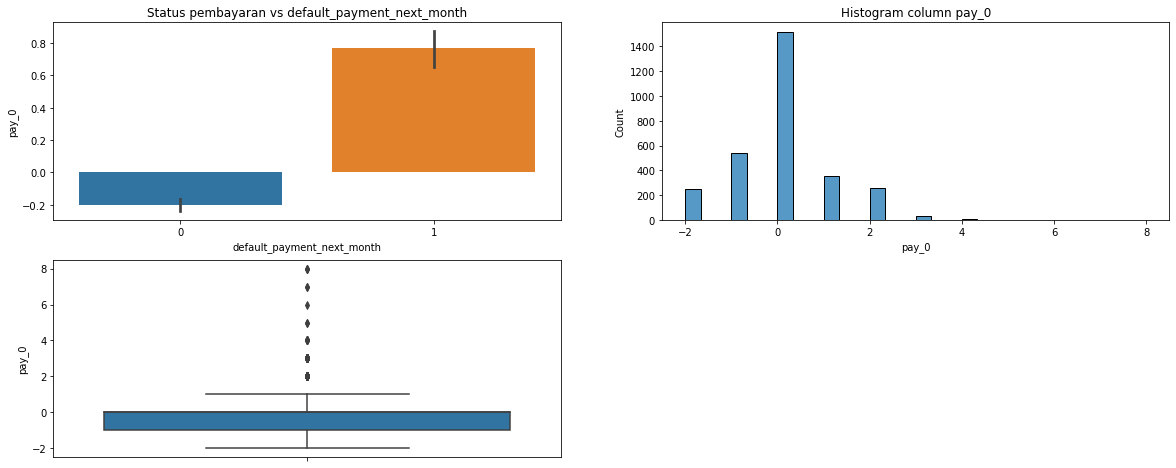

In [16]:
#Create visualisation for feature age
from statistics import mean


plt.figure(figsize=(20, 8))
plt.subplot(2,2,1)
sns.barplot(data=data, x = 'default_payment_next_month', y = 'pay_0', estimator=mean)
plt.title('Status pembayaran vs default_payment_next_month')

plt.subplot(2, 2, 2)
sns.histplot(data['pay_0'], bins=30)
plt.title('Histogram column pay_0')

plt.subplot(2, 2, 3)
sns.boxplot(y= data['pay_0'])


plt.show()

berdasarkan grafik tersebut tidak memperlihatkan bahwa adanya pengaruh status pembayaran dengan default  kartu kredit pada bulan depan. berdasarkan informasi dataset, jika status pembayaran customer tersebut 0, -1, -2 artinya customer tersebut membayar cicilan secara teratur per bulan nya sehingga pihak perusahan di melakukan default pada kartu kredit customer tersebut. jika status pembayaran customer 1 - 8 artinya customer tersebut melakukan tunggakan atau pending payment terhadap cicilan kartu kredit sehingga pihak perusahan melakukan default kartu kredit terhadap customer tersebut. hal ini diperlihatkan pada grafik tersebut bahwa status kurang 1 didefault 0 (tidak diblokir) dan status lebih dari 1 di dedefault 1 (diblokir).

## Splitting between X (Features) and y (Target) and Spliting data training dan data test

sebelum dilakukan analisis lebih lanjut terhadap dataset tersebut, diperlukan pemisahan data antar feature dan target serta pemisahan data antara data train dengan data test. hal ini bertujuan untuk menghindari adanya kebocoran data untuk data test

In [17]:
# Split between `X` (Features) and `y` (Target)
X = data_train_test.drop('default_payment_next_month', axis=1) 
y = data_train_test['default_payment_next_month']

# Split between Train-Set and Test-Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (2067, 23)
Test Size  :  (887, 23)


In [18]:
X_train

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
846,310000.0,1,2,1,29.0,completed,completed,completed,completed,completed,...,62992.0,62473.0,69837.0,69898.0,20000.0,20000.0,2500.0,11056.0,3000.0,4377.0
1757,50000.0,2,2,2,27.0,late pay,late pay,late pay,late pay,completed,...,45744.0,43123.0,42343.0,43020.0,0.0,3400.0,0.0,1528.0,3038.0,0.0
315,280000.0,2,2,2,33.0,completed,completed,completed,completed,completed,...,20209.0,20395.0,18969.0,18381.0,1634.0,1649.0,1304.0,703.0,701.0,705.0
1851,30000.0,1,2,1,45.0,late pay,late pay,late pay,late pay,late pay,...,17224.0,18241.0,18446.0,18009.0,1600.0,2000.0,1600.0,800.0,0.0,1600.0
2817,170000.0,2,1,2,42.0,completed,completed,completed,completed,completed,...,316.0,316.0,948.0,632.0,316.0,316.0,316.0,948.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337,60000.0,2,1,2,25.0,completed,completed,completed,late pay,late pay,...,27050.0,26317.0,28200.0,28762.0,1414.0,2678.0,0.0,2310.0,1173.0,0.0
406,150000.0,2,2,1,51.0,completed,completed,completed,completed,completed,...,148393.0,149709.0,107862.0,108623.0,7000.0,7600.0,6000.0,4000.0,4100.0,4300.0
1414,20000.0,1,3,2,32.0,completed,completed,completed,completed,late pay,...,6369.0,6891.0,6635.0,7287.0,1092.0,1106.0,628.0,0.0,762.0,0.0
2191,20000.0,1,2,2,25.0,minimun payment,minimun payment,minimiun payment,minimun payment,minimun payment,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature Selection

Setelah memisahkan data training dan test, dilakukan pemilihan feature. pemilihan feature bertujuan untuk memudahkan dalam proses analisis sehingga tidak terlalu feature yang dianalisis. selain itu, pemilihan feature bertujuan untuk memudahkan dalam membuat model prediksi default payment next month serta dapat memudahkan model dalam menentukan pola data yang memengaruhi terbentuknya target (default payment next month)

In [19]:
#combine features and target for feature selection
X_train_copy = X_train.copy()
X_train_copy['default_payment_next_month'] = y_train

Berikut dataset dari x train copy

In [20]:
X_train_copy

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
846,310000.0,1,2,1,29.0,completed,completed,completed,completed,completed,...,62473.0,69837.0,69898.0,20000.0,20000.0,2500.0,11056.0,3000.0,4377.0,0
1757,50000.0,2,2,2,27.0,late pay,late pay,late pay,late pay,completed,...,43123.0,42343.0,43020.0,0.0,3400.0,0.0,1528.0,3038.0,0.0,1
315,280000.0,2,2,2,33.0,completed,completed,completed,completed,completed,...,20395.0,18969.0,18381.0,1634.0,1649.0,1304.0,703.0,701.0,705.0,0
1851,30000.0,1,2,1,45.0,late pay,late pay,late pay,late pay,late pay,...,18241.0,18446.0,18009.0,1600.0,2000.0,1600.0,800.0,0.0,1600.0,1
2817,170000.0,2,1,2,42.0,completed,completed,completed,completed,completed,...,316.0,948.0,632.0,316.0,316.0,316.0,948.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337,60000.0,2,1,2,25.0,completed,completed,completed,late pay,late pay,...,26317.0,28200.0,28762.0,1414.0,2678.0,0.0,2310.0,1173.0,0.0,0
406,150000.0,2,2,1,51.0,completed,completed,completed,completed,completed,...,149709.0,107862.0,108623.0,7000.0,7600.0,6000.0,4000.0,4100.0,4300.0,0
1414,20000.0,1,3,2,32.0,completed,completed,completed,completed,late pay,...,6891.0,6635.0,7287.0,1092.0,1106.0,628.0,0.0,762.0,0.0,0
2191,20000.0,1,2,2,25.0,minimun payment,minimun payment,minimiun payment,minimun payment,minimun payment,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


## Correlation Test

pada bagian ini akan dilakukan uji korelasi mengunakan grafik heatmap dan nilai VIF. hal ini ingin melihat seberapa kuat hubungan antara berbagai feature terhadap target dan seberapa kuat hubungan antara feature dengan feature. hubungan feature dengan target yang kuat akan memudahkan model untuk membaca pola dan model yang dibuat dapat memprediksi default payment next month secara akurat. sebaliknya hubungan feature dengan feature yang kuat akan menyulitkan model untuk membaca pola dan model yang dibuat tidak dapat memprediksi default payment next month secara akurat.

interval columns not set, guessing: ['limit_balance', 'sex', 'education_level', 'marital_status', 'age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6', 'default_payment_next_month']


<AxesSubplot:title={'center':'Correlation Heatmap between feature and target/feature'}>

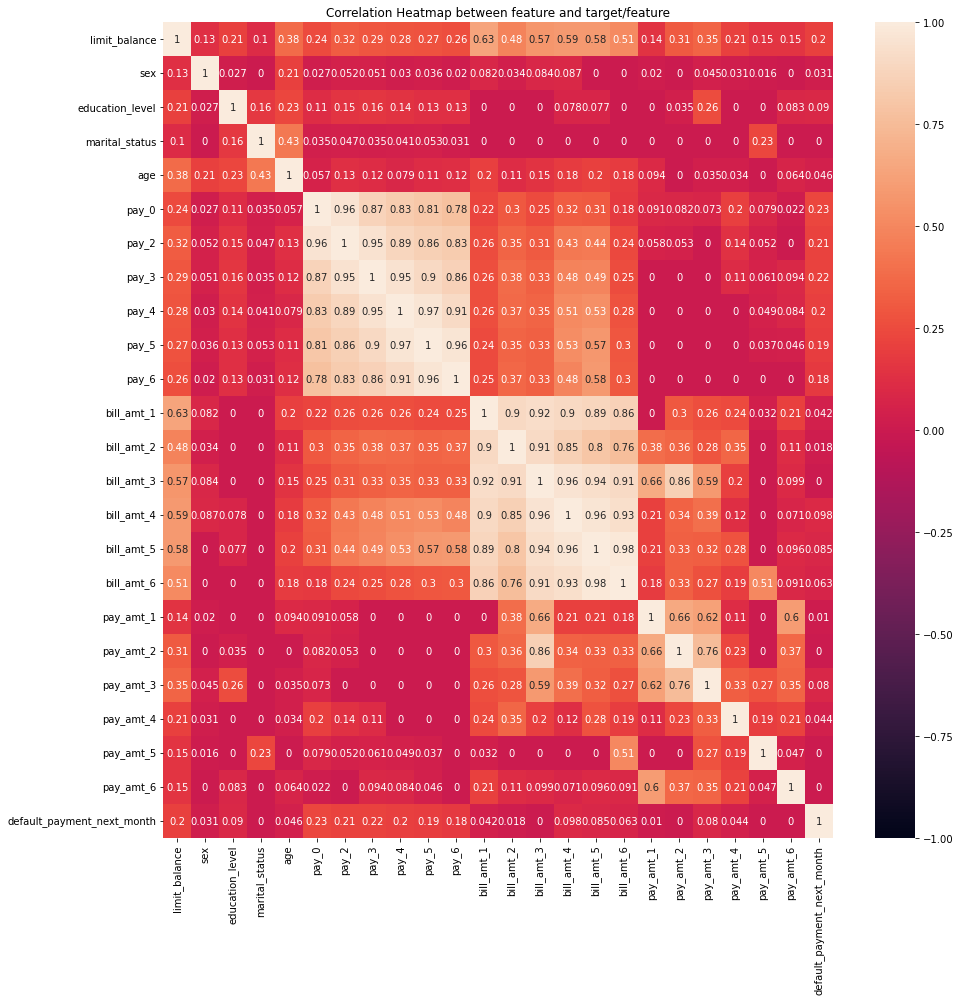

In [21]:
plt.figure(figsize=(15, 15))
plt.title('Correlation Heatmap between feature and target/feature')
sns.heatmap(X_train_copy.phik_matrix(), vmin=-1, vmax=1, annot=True)

Credit card merupakan salah metode pembayaran cicilan  yang dilakukan seseorang ketika berbelanja atau membeli suatu barang yang diinginkan. setiap kartu kredit atau credit card memiliki limit tertentu. limit tersebut ditentukan oleh perusahan credit card atau bank berdasarkan faktor tertentu. menurut salah satu bank (sumber: https://www.ocbcnisp.com/id/article/2021/10/11/limit-kartu-kredit), limit credit ditentukkan berdasarkan saldo rekening, riwat keuangan, pendapatan atau gaji, status kepemilikkan rumah, jumlah hutang, dan jumlah pengajuan. setelah semua faktor tersebut, maka seseorang akan mendapatkan limit credit card. akan tetapi limit kartu kredit tersebut akan bertambah apabila seseorang membayar tepat waktu setiap cicilannya per bulan. 

selain itu, ada kemungkinan customer dari kartu kredit lupa atau sengaja tidak membayar cicilan kartu kreditnya per bulan. hal ini dikarenakan keadaan ekonomi dari customer itu sendiri yang sedang tidak baik - baik aja. sehingga membuat customer melakukan keterlambatan pembayaran atau yang sering dikenal dengan tunggakan kartu kredit. apakah kartu kredit dari customer tersebut langsung default atau tidak?.

menurut salah satu website bank (sumber: https://www.bankrate.com/finance/credit-cards):
*"Default happens after missing a payment for 30 days. Default usually happens after six months in a row of not making at least the minimum payment due, which means your credit card is seriously delinquent. During that time you will be contacted by your creditor and they will want to know what you’re going to do about it. If they are not satisfied with your response (or the lack thereof), the account will be closed and after 180 days with no payment, reported as charged off to the credit bureaus."*

jika dibahasa indonesiakan, maka berbunyi demikian:
"Kartu kredit yang di default (*default payment: yes*) oleh pihak bank akan terjadi jika customer tersebut tidak melakukan pembayaran cicilan setelah satu bulan. akan tetapi, biasanya default kartu kredit terjadi setelah enam bulan customer tersebut tidak sama sekali membayaran cicilan kartu kredit bahkan pembayaran minimun dari kartu kredit tersebut tidak dibayarkan oleh customer. selama masa default, customer akan dikontak oleh pihak perusahaan dan diminta penjelasan "mengapa tidak membayar cicilan kartu kredit selama enam bulan?". jika customer menjawab dengan jawaban yang tidak memuaskan bagi pihak kartu kredit, maka kartu kredit tersebut ditutu oleh pihak perusahaan sampai waktu yang ditentukan."

berdasarkan informasi tersebut, default payment kartu kredit hanya terjadi jika customer melakukan tunggakan pembayaran kartu kredit. dengan kata lain, default payment yes or no tidak dipengaruhi oleh limit kartu kredit, pembayaran cicilan per bulan, total bill kartu kredit, usia bahkan level pendidikan. hal ini dikarenakan informasi tersebut tidak akan membuat default payment yes or no jika customer tersebut tidak melakukan tunggakan atau keterlambatan pembayaran.

oleh karena itu, untuk memprediksi default payment kartu kredit customer hanya diperlukan kolom yang menginformasikan status pembayaran customer seperti pembayaran cicilan telah telat dibayarkan selama 3 bulan, dsb. pada dataset, informasi tersebut tertera pada kolom pay_0, pay_2, pay_3, pay_4, pay_5, dan pay_6. kolom tersebut berisikan status keterlambatan atau ketepatan customer dalam membayar kartu kredit. kolom tersebut berisikan data numerical dari -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, dst. nilai - nilai mengandung arti sebagai berikut: -1=  pembayaran sewajarnya, 1=tunggakan 1 bulan, 2=tunggakan 2 bulan, ... 8=tunggakan 8 bulan, 9=tunggakan 9 bulan and above.

berdasarkan informasi tersebut, dapat disimpulkan bahwa kolom limit_balance, sex, education_level, marital_status, age, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, dan pay_amt_6 tidak diperlukan dalam memprediksi default payment customer. sehingga kolom - kolom dapat direduksi untuk mempermudah dalam menganalisis data dan menentukan pola data yang terjadi untuk default payment yes (1) dan default payment no (0). oleh karena itu dilakukan uji korelasi mengunakan heatmap dalam memprediksi feature tersebut.

Pada grafik ini membuktikan bahwa default payment pada kartu kredit hanya terjadi jika customer melakukam tunggakan atau keterlambatan saat membayar cicilan kartu kredit. hal ini terlihat pada nilai korelasi pada kolom pay_0, pay_2, pay_3, pay_4, pay_5, dan pay_6 yang cukup tinggi (mendekati positif 1) dibanding feature yang lain terhadap target (default_payment_next_month). pada uji korelasi heatmap menghasilkan range nilai dari -1 sampai 1. jika feature tersebut memperoleh nilai -1 terhadap feature lain atau target, maka feature tersebut memiliki hubungan yang sangat kuat tetapi berbanding terbalik terhadap feature atau target tersebut. jika feature tersebut memperoleh nilai 1 terhadap feature lain atau target, maka feature tersebut memiliki hubungan yang sangat kuat dan berbanding lurus terhadap feature yang lain atau target.

pada kasus ini feature pay_0, pay_2, pay_3, pay_4, pay_5, dan pay_6 memiliki nilai yang cukup tinggi terhadap target. nilai tersebut diantara: pay_0 memperoleh nilai 0.45, pay_2 memperoleh nilai 0.46, pay_3 memperoleh niai 0.36, pay_4 memperoleh nilai 0.33, pay_5 memperoleh nilai 0.32, dan pay_6 memperoleh nilai 0.39 terhadap target. hal tersebut membuktikan bahwa seorang customer akan di default kartu kreditnya jika customer melakukan tunggakan atau keterlambatan saat membayar cicilan. selain itu, limit balance, total bill (bill_amt_1 - bill_amt_6), pembayaran cicilan perbulan (pay_amt_1 - pay_amt_6), sec, tingkat pendidikan, dan martial status tidak memengaruhi sebuah perusahaan untuk melakukan default kartu kredit customer. meskipun customer tersebut memiliki tingkat pendidikkan rendah dengan status telah menikah, memiliki limit kredit yang tinggi dan menghabiskan limit kredit tersebut untuk belanja pada bulan tersebut, selama customer tersebut bisa membayar secara teratur cicilan kartu kredit tanpa tunggakan maka kartu kredit customer tersebut tidak akan didefault oleh pihak kartu kredit begitu sebaliknya.

selain itu, dipilih limit balance dengan nilai korelasi 0.2. feature ini dipilih karena limit balance memiliki hubungan default payment. ketika customer belanja melebihi dari limit kartu kredit yang dimiliki oleh customer, maka customer tersebut di default oleh pihak perusahan untuk tidak dapat digunakan dalam jangka waktu tertentu.

jadi, pada pembuatan model prediksi default payment kartu kredit hanya di perlukan feature limit_balance, pay_0, pay_2, pay_3, pay_4, pay_5, dan pay_6. 

In [22]:
#dataframe after selection each feature
X_train_ok = X_train[['limit_balance', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']]
X_test_ok =  X_test[['limit_balance', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']]

Berikut dataframe dari feature - feature yang dipakai dalam pembuatan model prediksi default payment next month

In [23]:
X_train_ok.reset_index(drop=True)

,limit_balance,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
0,310000.0,completed,completed,completed,completed,completed,completed
1,50000.0,late pay,late pay,late pay,late pay,completed,completed
2,280000.0,completed,completed,completed,completed,completed,completed
3,30000.0,late pay,late pay,late pay,late pay,late pay,late pay
4,170000.0,completed,completed,completed,completed,completed,completed
...,...,...,...,...,...,...,...
2062,60000.0,completed,completed,completed,late pay,late pay,late pay
2063,150000.0,completed,completed,completed,completed,completed,completed
2064,20000.0,completed,completed,completed,completed,late pay,late pay
2065,20000.0,minimun payment,minimun payment,minimiun payment,minimun payment,minimun payment,minimun payment


# **5 - Data Preprocessing**

## Handling Outlier

In [24]:
# Function to create histogram and boxplot.
# This functions takes a dataframe (df) and the variable of interest as arguments.

def diagnostic_plots(X_train_fix, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(X_train_fix[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=X_train_fix[variable])
    plt.title('Boxplot')

    plt.show()

## Skewness

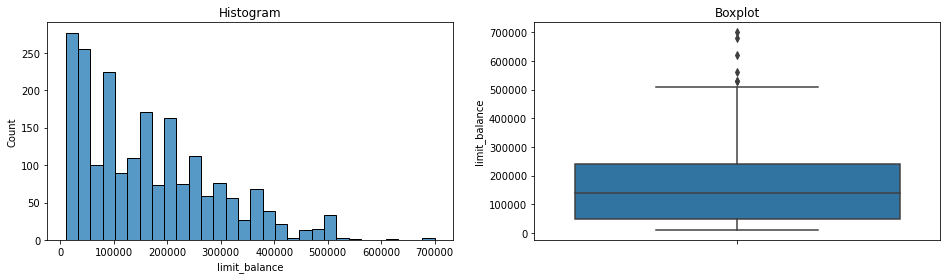


Skewness Value :  0.8902050302747887


In [25]:
# let's inspect now the variable limit_balance from X_train
# refers to the limit_balance of the passengers on board

diagnostic_plots(X_train_ok, 'limit_balance')
print('\nSkewness Value : ', X_train_ok['limit_balance'].skew())

Pada bagian tersebut terdapat beberapa outlier atau nilai yang terlalu besar dari rata - rata limit balance. untuk mendapatkan hasil model yang lebih akurat perlu dilakukan handling outlier. handling outlier dilakukan mengunakan metode capping. hal ini bertujuan agar tidak mengurangi banyak data dan membuat data menjadi distribusi normal.

## IQR, Upper Limit, and Lower Limit

In [26]:
# Function to find upper and lower boundaries for skewed distributed variables
# Let's calculate the boundaries outside which sit the outliers for skewed distributions
# limit passed as an argument, gives us the option to estimate 1.5 times or 3 times the IQR to calculate the boundaries.

def find_skewed_boundaries(df, variable, distance):
    IQR = X_train_ok[variable].quantile(0.75) - X_train_ok[variable].quantile(0.25)

    lower_boundary = X_train_ok[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = X_train_ok[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [27]:
# Limits for 'limit_balance'
limit_upper_limit, limit_lower_limit = find_skewed_boundaries(X_train_ok, 'limit_balance', 1.5)
limit_upper_limit, limit_lower_limit


print('limit_upper_limit : ', limit_upper_limit)
print('limit_lower_limit : ', limit_lower_limit, '\n')

limit_upper_limit :  525000.0
limit_lower_limit :  -235000.0 



## Outlier and Cleaning from outlier

In [28]:
# Flag the outliers in category `limit_balance`
outliers_limit = np.where(X_train_ok['limit_balance'] > limit_upper_limit, True,
                       np.where(X_train_ok['limit_balance'] < limit_lower_limit, True, False))


print('bool outlier distance:',outliers_limit[:10])

bool outlier distance: [False False False False False False False False False False]


In [29]:
#Handling outlier with capping method
windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['limit_balance'])

windsoriser.fit_transform(X_train_ok)

X_train_fix = windsoriser.transform(X_train_ok)

In [30]:
X_train_fix

,limit_balance,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
846,310000.0,completed,completed,completed,completed,completed,completed
1757,50000.0,late pay,late pay,late pay,late pay,completed,completed
315,280000.0,completed,completed,completed,completed,completed,completed
1851,30000.0,late pay,late pay,late pay,late pay,late pay,late pay
2817,170000.0,completed,completed,completed,completed,completed,completed
...,...,...,...,...,...,...,...
1337,60000.0,completed,completed,completed,late pay,late pay,late pay
406,150000.0,completed,completed,completed,completed,completed,completed
1414,20000.0,completed,completed,completed,completed,late pay,late pay
2191,20000.0,minimun payment,minimun payment,minimiun payment,minimun payment,minimun payment,minimun payment


## Cleaning data outlier with capping censoring method

In [31]:
# Inspect the minimum caps for each variable
print('Left Tail Caps  : ', windsoriser.left_tail_caps_)

# Iinspect the maximum caps for each variable
print('Right Tail Caps : ', windsoriser.right_tail_caps_)

Left Tail Caps  :  {'limit_balance': -235000.0}
Right Tail Caps :  {'limit_balance': 525000.0}


In [32]:
print('X_train Dataframe - Before Capping')
print(X_train_ok.describe())
print('')
print('X_train Dataframe - After Capping')
print(X_train_fix.describe())

X_train Dataframe - Before Capping
       limit_balance
count    2067.000000
mean   163715.529753
std    122471.058144
min     10000.000000
25%     50000.000000
50%    140000.000000
75%    240000.000000
max    700000.000000

X_train Dataframe - After Capping
       limit_balance
count    2067.000000
mean   163488.147073
std    121668.778274
min     10000.000000
25%     50000.000000
50%    140000.000000
75%    240000.000000
max    525000.000000


distance - Before Capping


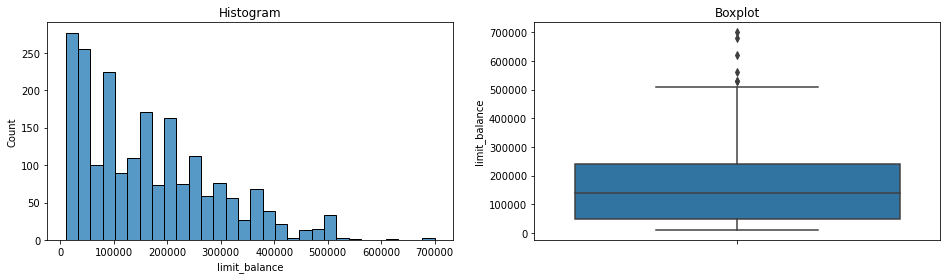

distance - After Capping


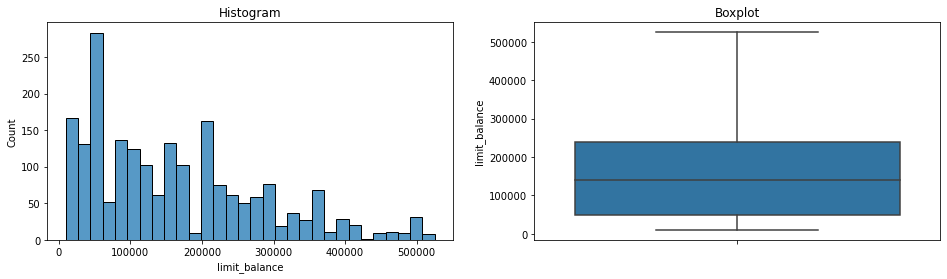

In [33]:
# Let's find outliers in `limit_balance`

print('distance - Before Capping')
diagnostic_plots(X_train_ok, 'limit_balance')
print('distance - After Capping')
diagnostic_plots(X_train_fix, 'limit_balance')

In [34]:
# let's inspect now the variable limit_balance from X_train after capping

print('\nSkewness Value limit balance after caping : ', X_train_fix['limit_balance'].skew())


Skewness Value limit balance after caping :  0.8424137128186409


Berdasarkan grafik overview tersebut tidak terdapat nilai outlier pada grafik tersebut dan nilai skew yang kecil meskipun grafik tersebut tetap tidak terdiistribusi normal. setidaknya pada grafik ini tidak terdapat nilai outlier yang menganggu model dalam mempelajari pola tersebut.

## Split between Numerical Columns and Categorical Columns 

In [35]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train_fix.select_dtypes(include=np.number).columns.tolist() 
cat_columns = X_train_fix.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns   : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns   :  ['limit_balance']
Categorical Columns :  ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']


In [36]:
# Split Train-Set and Test-Set based on Column Types 

X_train_num = X_train_fix[num_columns]
X_train_cat= X_train_fix[cat_columns]
X_test_num =X_test_ok[num_columns]
X_test_cat = X_test_ok[cat_columns]

## Feature Scalling

Pada kasus ini dilakukan proses scalling pada feature limit balance untuk memperkecil rentang limit balance menjadi rentang 0 - 1. dalam menscaling dilakukan dengan metode min max scaller. hal ini dikarenakan data pada limit balance yang tidak terdistribusi normal

In [37]:
# Feature Scaling using MinMaxScaller

scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_train_num_scaled_ok = pd.DataFrame(X_train_num_scaled).reset_index(drop=True)
X_test_num_scaled = scaler.transform(X_test_num)
X_test_num_scaled_ok = pd.DataFrame(X_test_num_scaled).reset_index(drop=True)

Berikut hasil scaling dari feature limit balance tersebut:

In [38]:
X_train_num_scaled_ok

,0
0,0.582524
1,0.077670
2,0.524272
3,0.038835
4,0.310680
...,...
2062,0.097087
2063,0.271845
2064,0.019417
2065,0.019417


## Feature Encoding

Pada kasus ini dilakukan proses encoding untuk mengurangi cardinalitas dari feature categorical. selain itu proses encoding bertujuan untuk mengubah data categorical menjadi data numerical supaya memudahkan model dalam mempelajari pola data dalam membentuk nilai 1 dan 0 pada default payment tersebut.

In [39]:
encoder = OneHotEncoder()

encoder.fit_transform(X_train_cat)

X_train_encoded = encoder.transform(X_train_cat).toarray()
X_test_encoded = encoder.transform(X_test_cat).toarray()

X_train_cat_ok = pd.DataFrame(X_train_encoded).reset_index(drop=True)
X_test_cat_ok = pd.DataFrame(X_test_encoded).reset_index(drop=True)

Berikut Hasil encoding dari feature categorical tersebut:

In [40]:
X_train_cat_ok

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2062,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2063,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2064,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2065,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


## Concate between Numerical Columns and Categorical Columns

In [41]:
# Concat columns
X_train_final = pd.concat([X_train_num_scaled_ok, X_train_cat_ok], axis=1)
X_test_final = pd.concat([X_test_num_scaled_ok, X_test_cat_ok], axis=1)

Berikut data train final sebelum dimasukkan dalam model:

In [42]:
X_train_final

,0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.582524,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.077670,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.524272,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.038835,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.310680,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2062,0.097087,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2063,0.271845,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2064,0.019417,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2065,0.019417,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


Berikut data test final sebelum dimasukkan model:

In [43]:
X_test_final

,0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.019417,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.077670,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.679612,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.330097,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.038835,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,0.951456,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
883,0.116505,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
884,0.019417,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
885,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# **6 - Model Definition**

pada kasus ini dilakukan pembuatan 8 model untuk memprediksi untuk melihat model mana yang paling baik dalam memprediksi default payment untuk kartu kredit customer. model yang digunakan pada kasus ini yaitu desicion tree, logistic reggression, svm, random forest, KNN, Naive bayes, Bagging classifier dan ada boost classifier.

## Logistic linear

In [44]:
# Training using logistic Regression

logreg = LogisticRegression()

## SVM

In [45]:
# Training using SVM
SVM = SVC(probability=True)

## Decision Tree

In [46]:
# Training using Desicion Tree
dt= DecisionTreeClassifier()

## Random Forest

In [47]:
# Training using  Random forest
RF = RandomForestClassifier()

## KNN 

In [48]:
# Training using KNN
knn = KNeighborsClassifier()

## Naive Baiyes

In [49]:
# Training using Naive Bayes
NB = GaussianNB()

## Bagging Classifier

In [50]:
# Training using Bagging Classifier
BC = BaggingClassifier()

## Ada Boost Classifier

In [51]:
# Training using AdaboostClassifier
AB = AdaBoostClassifier()

# **7 - Model Training**

Berikut training model dari ke 8 model tersebut:

## Logistic regression

In [52]:
# Train the Model
logreg.fit(X_train_final, y_train)

LogisticRegression()

## SVM

In [53]:
# Train the Model
SVM.fit(X_train_final, y_train)

SVC(probability=True)

## Decision Tree

In [54]:
# Train the Model
dt.fit(X_train_final, y_train)

DecisionTreeClassifier()

## Random Forest 

In [55]:
RF.fit(X_train_final, y_train)

RandomForestClassifier()

## KNN

In [56]:
# Train the Model
knn.fit(X_train_final, y_train)

KNeighborsClassifier()

## Naive Bayes

In [57]:
# Train the Model
NB.fit(X_train_final, y_train)

GaussianNB()

## Bagging Classifier

In [58]:
# Train the Model
BC.fit(X_train_final, y_train)

BaggingClassifier()

## Ada Boost Classifier

In [59]:
# Train the Model
AB.fit(X_train_final, y_train)

AdaBoostClassifier()

# **8 - Model Evaluation**

## Logistic Regression

In [60]:
# Predict Train-Set and Test-Set 

y_pred_train = logreg.predict(X_train_final)
y_pred_test = logreg.predict(X_test_final)

y_proba_train = logreg.predict_proba(X_train_final)
y_proba_test = logreg.predict_proba(X_test_final)

#Evaluate model logistic
print("Training")
print(classification_report(y_train,y_pred_train))
print('ROC AUC Score:',roc_auc_score(y_train,y_proba_train[:,1]))
print("\n===========================\n")
print("Test")
print(classification_report(y_test,y_pred_test))
print('ROC AUC Score:',roc_auc_score(y_test,y_proba_test[:,1]))

Training
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1624
           1       0.69      0.36      0.47       443

    accuracy                           0.83      2067
   macro avg       0.77      0.66      0.68      2067
weighted avg       0.81      0.83      0.81      2067

ROC AUC Score: 0.7773590832768071


Test
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       699
           1       0.62      0.32      0.42       188

    accuracy                           0.82       887
   macro avg       0.73      0.63      0.66       887
weighted avg       0.79      0.82      0.79       887

ROC AUC Score: 0.7647703406081637


pada kasus ini diharapkan model ini mampu membedakan 0 dan 1. positif pada kasus ini adalah 1 (kartu kredit di default). jika model tersebut lebih banyak memprediksi false positif, maka dapat merugikan perusahan karena jika model menebak diblokir padahal tidak diblokir, maka customer menjadi tidak puas dan dapat menyebabkan customer yang rajin bayar cicilan pindah ke bank/perusahan kredit lain sehingga perusahan mengalami customer tersebut. jika model tersebut banyak menebak false negatif, maka perusahaan juga dapat dirugikan. ketika customer yang sering telat bayar atau melakukan tunggakan dan kartu kreditnya tidak diblokir, maka customer tersebut bisa belanja terus dan hal tersebut membuat perusahan mengalami kerugian besar. oleh karena itu, pada kasus ini tidak diharapkan nilai FN (false negatif) atau FP (false positif) melainkan diharapkan model mampu memprediksi dengan benar 0 dan 1 serta mampu mebedakan 0 dan 1 secara akurat.

untuk mengetahui hal tersebut, dilihat dari nilai f1 score, accuracy, roc auc score, recall, dan precision. dikarenakan data yang imbalance, maka tidak dapat melihat keakurasian model dalam memprediksi mengunakan nilai akurasi dan roc auc score. pada kasus ini tidak diharapkan nilai false negatif maupun false positif dengan kata lain sebisa mungkin nilai false negatif dan nilai false positif dapat di minimalisir. oleh karena itu digunakan nilai f1 score untuk melihat seberapa banyak nilai false positif dan false negatif yang diprediksi oleh model. nilai f1 score nya semakin besar, maka nilai rata - rata kemunculan dari false positif dan false negatif semakin kecil artinya f1 score semakin besar menyebabkan model semakin akurat dalam membedakan nilai default 0 dan 1

pada model logistic reggression, didapat nilai f1 score train untuk default 0 (0.90), default 1 (0.47) dan f1 score test untuk default 0 (0.89), default 1 (0.42). hal ini dapat mengartikan bahwa model tersebut bagus dalam memprediksi default 0 daripada default 1 (terlihat perbedaan f1 score default 1 yang berbeda antara train dan test). selain itu, nilai tersebut menginfokan adanya data imbalance pada default 0 dan 1. nilai roc auc score train untuk default 0 (0.77) dan test (0.76). hal ini mengartikan bahwa model cukup konsisten dalam memprediksi default 0 dan default 1 secara tepat. oleh karena itu model itu udah cukup baik dalam memprediksi default 0 dan default 1.

## SVM

In [61]:
# Predict Train-Set and Test-Set 

y_pred_train_sv = SVM.predict(X_train_final)
y_pred_test_sv = SVM.predict(X_test_final)

y_proba_train_sv = SVM.predict_proba(X_train_final)
y_proba_test_sv = SVM.predict_proba(X_test_final)

#Evaluate model logistic
print("Training")
print(classification_report(y_train,y_pred_train_sv))
print('ROC AUC Score:',roc_auc_score(y_train,y_proba_train_sv[:,1]))
print("\n===========================\n")
print("Test")
print(classification_report(y_test,y_pred_test_sv))
print('ROC AUC Score:',roc_auc_score(y_test,y_proba_test_sv[:,1]))

Training
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1624
           1       0.68      0.45      0.54       443

    accuracy                           0.84      2067
   macro avg       0.77      0.70      0.72      2067
weighted avg       0.82      0.84      0.82      2067

ROC AUC Score: 0.7088981307475898


Test
              precision    recall  f1-score   support

           0       0.85      0.92      0.89       699
           1       0.59      0.41      0.48       188

    accuracy                           0.81       887
   macro avg       0.72      0.67      0.68       887
weighted avg       0.80      0.81      0.80       887

ROC AUC Score: 0.648015401941984


pada kasus ini diharapkan model ini mampu membedakan 0 dan 1. positif pada kasus ini adalah 1 (kartu kredit di default). jika model tersebut lebih banyak memprediksi false positif, maka dapat merugikan perusahan karena jika model menebak diblokir padahal tidak diblokir, maka customer menjadi tidak puas dan dapat menyebabkan customer yang rajin bayar cicilan pindah ke bank/perusahan kredit lain sehingga perusahan mengalami customer tersebut. jika model tersebut banyak menebak false negatif, maka perusahaan juga dapat dirugikan. ketika customer yang sering telat bayar atau melakukan tunggakan dan kartu kreditnya tidak diblokir, maka customer tersebut bisa belanja terus dan hal tersebut membuat perusahan mengalami kerugian besar. oleh karena itu, pada kasus ini tidak diharapkan nilai FN (false negatif) atau FP (false positif) melainkan diharapkan model mampu memprediksi dengan benar 0 dan 1 serta mampu mebedakan 0 dan 1 secara akurat.

untuk mengetahui hal tersebut, dilihat dari nilai f1 score, accuracy, roc auc score, recall, dan precision. dikarenakan data yang imbalance, maka tidak dapat melihat keakurasian model dalam memprediksi mengunakan nilai akurasi dan roc auc score. pada kasus ini tidak diharapkan nilai false negatif maupun false positif dengan kata lain sebisa mungkin nilai false negatif dan nilai false positif dapat di minimalisir. oleh karena itu digunakan nilai f1 score untuk melihat seberapa banyak nilai false positif dan false negatif yang diprediksi oleh model. nilai f1 score nya semakin besar, maka nilai rata - rata kemunculan dari false positif dan false negatif semakin kecil artinya f1 score semakin besar menyebabkan model semakin akurat dalam membedakan nilai default 0 dan 1.

pada model svm, didapat nilai f1 score train untuk default 0 (0.90), default 1 (0.54) dan f1 score test untuk default 0 (0.89), default 1 (0.48). secara nilai model ini lebih baik dalam memprediksi default 1 daripada model logistic reggresiaon. akan tetapi, masih terlihat nilai yang tidak konsisten pada data train dan data test untuk default 1 (perbedaan yang cukup signifikan). selain itu, nilai tersebut menginfokan adanya data imbalance pada default 0 dan 1. Meskipun demikian model tersebut kurang dapat membedakan atau membaca pola antara 0 dan 1 terlihat dari nilai roc auc score train untuk default 0 (0.70) dan test (0.64). hal ini mengartikan bahwa model tidak cukup konsisten dalam memprediksi default 0 dan default 1 secara tidak tepat. oleh karena itu model itu  tidak cukup baik dalam memprediksi default 0 dan default 1 dibanding model sebelumnya.

## Desicion Tree

In [62]:
# Predict Train-Set and Test-Set 

y_pred_train = dt.predict(X_train_final)
y_pred_test = dt.predict(X_test_final)

y_proba_train = dt.predict_proba(X_train_final)
y_proba_test = dt.predict_proba(X_test_final)

#Evaluate model logistic
print("Training")
print(classification_report(y_train,y_pred_train))
print('ROC AUC Score:',roc_auc_score(y_train,y_proba_train[:,1]))
print("\n===========================\n")
print("Test")
print(classification_report(y_test,y_pred_test))
print('ROC AUC Score:',roc_auc_score(y_test,y_proba_test[:,1]))

Training
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1624
           1       0.90      0.55      0.68       443

    accuracy                           0.89      2067
   macro avg       0.89      0.77      0.81      2067
weighted avg       0.89      0.89      0.88      2067

ROC AUC Score: 0.9136652247884441


Test
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       699
           1       0.51      0.37      0.43       188

    accuracy                           0.79       887
   macro avg       0.68      0.64      0.65       887
weighted avg       0.77      0.79      0.78       887

ROC AUC Score: 0.6694289714790126


pada kasus ini diharapkan model ini mampu membedakan 0 dan 1. positif pada kasus ini adalah 1 (kartu kredit di default). jika model tersebut lebih banyak memprediksi false positif, maka dapat merugikan perusahan karena jika model menebak diblokir padahal tidak diblokir, maka customer menjadi tidak puas dan dapat menyebabkan customer yang rajin bayar cicilan pindah ke bank/perusahan kredit lain sehingga perusahan mengalami customer tersebut. jika model tersebut banyak menebak false negatif, maka perusahaan juga dapat dirugikan. ketika customer yang sering telat bayar atau melakukan tunggakan dan kartu kreditnya tidak diblokir, maka customer tersebut bisa belanja terus dan hal tersebut membuat perusahan mengalami kerugian besar. oleh karena itu, pada kasus ini tidak diharapkan nilai FN (false negatif) atau FP (false positif) melainkan diharapkan model mampu memprediksi dengan benar 0 dan 1 serta mampu mebedakan 0 dan 1 secara akurat.

untuk mengetahui hal tersebut, dilihat nilai f1 score, accuracy, dan roc auc score. f1 score untuk mengetahui presentasi prediksi 0 dan 1 secara benar. accuracy untuk melihat seberapa tepat model dalam memprediksi default payment kartu kredit customer. roc auc score untuk mengetahui seberapa tepat model dalam membedakan default 0 dan 1. nilai f1 score, accuracy, dan roc auc score yang mendekati 1 maka model tersebut mampu memprediksi default payment kartu kredit customer.selain itu, nilai f1 score melihat kemungkinan banyaknya nilai True Positif (TP) dan True Negatif (TN) yag diperiksi oleh model tersebut.  selain itu, nilai f1 score digunakan untuk melihat kemungkinan false positif dan false negatif (nilai f1 score semakin besar, maka kemungkinan muncul rata - rata nilai prediksi false positif dan negatif semakin kecil).

pada model desicion tree, didapat nilai f1 score train untuk default 0 (0.90), default 1 (0.68) dan f1 score test untuk default 0 (0.87), default 1 (0.43). secara nilai model ini lebih baik dalam memprediksi default 1 daripada model logistic reggresiaon dan svm. akan tetapi, masih terlihat nilai yang tidak konsisten pada data train dan data test untuk default 1 (perbedaan yang cukup sangat signifikan). selain itu, nilai tersebut menginfokan adanya data imbalance pada default 0 dan 1. Meskipun demikian model tersebut kurang dapat membedakan atau membaca pola antara 0 dan 1 terlihat dari nilai roc auc score train untuk default 0 (0.91) dan test (0.67). hal ini mengartikan bahwa model tidak cukup konsisten dalam memprediksi default 0 dan default 1 secara tidak tepat. oleh karena itu model itu tidak cukup baik dalam memprediksi default 0 dan default 1 dibanding model sebelumnya.

## Random Forest

In [63]:
# Predict Train-Set and Test-Set 

y_pred_train = RF.predict(X_train_final)
y_pred_test = RF.predict(X_test_final)

y_proba_train = RF.predict_proba(X_train_final)
y_proba_test = RF.predict_proba(X_test_final)

#Evaluate model logistic
print("Training")
print(classification_report(y_train,y_pred_train))
print('ROC AUC Score:',roc_auc_score(y_train,y_proba_train[:,1]))
print("\n===========================\n")
print("Test")
print(classification_report(y_test,y_pred_test))
print('ROC AUC Score:',roc_auc_score(y_test,y_proba_test[:,1]))

Training
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1624
           1       0.85      0.59      0.70       443

    accuracy                           0.89      2067
   macro avg       0.87      0.78      0.82      2067
weighted avg       0.89      0.89      0.88      2067

ROC AUC Score: 0.8997667604443506


Test
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       699
           1       0.54      0.39      0.45       188

    accuracy                           0.80       887
   macro avg       0.69      0.65      0.67       887
weighted avg       0.78      0.80      0.79       887

ROC AUC Score: 0.710559157458984


pada kasus ini diharapkan model ini mampu membedakan 0 dan 1. positif pada kasus ini adalah 1 (kartu kredit di default). jika model tersebut lebih banyak memprediksi false positif, maka dapat merugikan perusahan karena jika model menebak diblokir padahal tidak diblokir, maka customer menjadi tidak puas dan dapat menyebabkan customer yang rajin bayar cicilan pindah ke bank/perusahan kredit lain sehingga perusahan mengalami customer tersebut. jika model tersebut banyak menebak false negatif, maka perusahaan juga dapat dirugikan. ketika customer yang sering telat bayar atau melakukan tunggakan dan kartu kreditnya tidak diblokir, maka customer tersebut bisa belanja terus dan hal tersebut membuat perusahan mengalami kerugian besar. oleh karena itu, pada kasus ini tidak diharapkan nilai FN (false negatif) atau FP (false positif) melainkan diharapkan model mampu memprediksi dengan benar 0 dan 1 serta mampu mebedakan 0 dan 1 secara akurat.

untuk mengetahui hal tersebut, dilihat nilai f1 score, accuracy, dan roc auc score. f1 score untuk mengetahui presentasi prediksi 0 dan 1 secara benar. accuracy untuk melihat seberapa tepat model dalam memprediksi default payment kartu kredit customer. roc auc score untuk mengetahui seberapa tepat model dalam membedakan default 0 dan 1. nilai f1 score, accuracy, dan roc auc score yang mendekati 1 maka model tersebut mampu memprediksi default payment kartu kredit customer. selain itu, nilai f1 score melihat kemungkinan banyaknya nilai True Positif (TP) dan True Negatif (TN) yag diperiksi oleh model tersebut.  selain itu, nilai f1 score digunakan untuk melihat kemungkinan false positif dan false negatif (nilai f1 score semakin besar, maka kemungkinan muncul rata - rata nilai prediksi false positif dan negatif semakin kecil).

pada model random forest, model cukup akurat dan sensitif terhadap nilai default 0 daripada nilai default. hal ini terlihat dari nilai f1 score default 0 lebih besar daripada nilai default 1. artinya kemungkinan model untuk memprediksi false negatif dan false positif pada default lebih kecil daripada default 1. nilai f1 score pada default 1 (0.70) pada data train dan default 1 (0.45)) pada test membuat model ini kurang baik digunakan dalam memprediksi default payment next month karena model kurang sensitif dan akurat dalam memprediksi nilai default 1. akan 

## KNN

In [64]:
y_pred_train_knn = knn.predict(X_train_final)
y_pred_test_knn = knn.predict(X_test_final)

y_proba_train_knn = knn.predict_proba(X_train_final)
y_proba_test_knn = knn.predict_proba(X_test_final)

print("Training")
print(classification_report(y_train,y_pred_train_knn))
print('ROC AUC Score:',roc_auc_score(y_train,y_proba_train_knn[:,1]))
print("\n===========================\n")
print("Test")
print(classification_report(y_test,y_pred_test_knn))
print('ROC AUC Score:',roc_auc_score(y_test,y_proba_test_knn[:,1]))

Training
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1624
           1       0.73      0.44      0.55       443

    accuracy                           0.85      2067
   macro avg       0.80      0.70      0.73      2067
weighted avg       0.83      0.85      0.83      2067

ROC AUC Score: 0.8095546208675733


Test
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       699
           1       0.62      0.36      0.46       188

    accuracy                           0.82       887
   macro avg       0.73      0.65      0.67       887
weighted avg       0.80      0.82      0.80       887

ROC AUC Score: 0.7132834139956777


pada kasus ini diharapkan model ini mampu membedakan 0 dan 1. positif pada kasus ini adalah 1 (kartu kredit di default). jika model tersebut lebih banyak memprediksi false positif, maka dapat merugikan perusahan karena jika model menebak diblokir padahal tidak diblokir, maka customer menjadi tidak puas dan dapat menyebabkan customer yang rajin bayar cicilan pindah ke bank/perusahan kredit lain sehingga perusahan mengalami customer tersebut. jika model tersebut banyak menebak false negatif, maka perusahaan juga dapat dirugikan. ketika customer yang sering telat bayar atau melakukan tunggakan dan kartu kreditnya tidak diblokir, maka customer tersebut bisa belanja terus dan hal tersebut membuat perusahan mengalami kerugian besar. oleh karena itu, pada kasus ini tidak diharapkan nilai FN (false negatif) atau FP (false positif) melainkan diharapkan model mampu memprediksi dengan benar 0 dan 1 serta mampu mebedakan 0 dan 1 secara akurat.

untuk mengetahui hal tersebut, dilihat nilai f1 score, accuracy, dan roc auc score. f1 score untuk mengetahui presentasi prediksi 0 dan 1 secara benar. accuracy untuk melihat seberapa tepat model dalam memprediksi default payment kartu kredit customer. roc auc score untuk mengetahui seberapa tepat model dalam membedakan default 0 dan 1. nilai f1 score, accuracy, dan roc auc score yang mendekati 1 maka model tersebut mampu memprediksi default payment kartu kredit customer. selain itu, nilai f1 score melihat kemungkinan banyaknya nilai True Positif (TP) dan True Negatif (TN) yag diperiksi oleh model tersebut.  selain itu, nilai f1 score digunakan untuk melihat kemungkinan false positif dan false negatif (nilai f1 score semakin besar, maka kemungkinan muncul rata - rata nilai prediksi false positif dan negatif semakin kecil).

pada model knn, didapat nilai f1 score train untuk default 0 (0.91), default 1 (0.55) dan fi score test untuk default 0 (0.89), default 1 (0.46). secara nilai model ini lebih baik dalam memprediksi default 1 daripada model logistic reggresiaon, svm, dan desicion tree tetapi kurang baik terhadap model random forest. akan tetapi, masih terlihat nilai yang tidak konsisten pada data train dan data test untuk default 1 (perbedaan yang cukup sangat signifikan). selain itu, nilai tersebut menginfokan adanya data imbalance pada default 0 dan 1. Meskipun demikian model tersebut kurang dapat membedakan atau membaca pola antara 0 dan 1 terlihat dari nilai roc auc score train untuk default 0 (0.80) dan test (0.71). hal ini mengartikan bahwa model tidak cukup konsisten dalam memprediksi default 0 dan default 1 secara tidak tepat. oleh karena itu model itu tidak cukup baik dalam memprediksi default 0 dan default 1 dibanding model sebelumnya.

## Naive Bayes

In [80]:
y_pred_train_nb = NB.predict(X_train_final)
y_pred_test_nb = NB.predict(X_test_final)

y_proba_train_nb = NB.predict_proba(X_train_final)
y_proba_test_nb = NB.predict_proba(X_test_final)

print("Training")
print(classification_report(y_train,y_pred_train_knn))
print('ROC AUC Score:',roc_auc_score(y_train,y_proba_train_nb[:,1]))
print("\n===========================\n")
print("Test")
print(classification_report(y_test,y_pred_test_knn))
print('ROC AUC Score:',roc_auc_score(y_test,y_proba_test_nb[:,1]))

Training
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1624
           1       0.73      0.44      0.55       443

    accuracy                           0.85      2067
   macro avg       0.80      0.70      0.73      2067
weighted avg       0.83      0.85      0.83      2067

ROC AUC Score: 0.7572737937706413


Test
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       699
           1       0.62      0.36      0.46       188

    accuracy                           0.82       887
   macro avg       0.73      0.65      0.67       887
weighted avg       0.80      0.82      0.80       887

ROC AUC Score: 0.7582793047819073


pada kasus ini diharapkan model ini mampu membedakan 0 dan 1. positif pada kasus ini adalah 1 (kartu kredit di default). jika model tersebut lebih banyak memprediksi false positif, maka dapat merugikan perusahan karena jika model menebak diblokir padahal tidak diblokir, maka customer menjadi tidak puas dan dapat menyebabkan customer yang rajin bayar cicilan pindah ke bank/perusahan kredit lain sehingga perusahan mengalami customer tersebut. jika model tersebut banyak menebak false negatif, maka perusahaan juga dapat dirugikan. ketika customer yang sering telat bayar atau melakukan tunggakan dan kartu kreditnya tidak diblokir, maka customer tersebut bisa belanja terus dan hal tersebut membuat perusahan mengalami kerugian besar. oleh karena itu, pada kasus ini tidak diharapkan nilai FN (false negatif) atau FP (false positif) melainkan diharapkan model mampu memprediksi dengan benar 0 dan 1 serta mampu mebedakan 0 dan 1 secara akurat.  selain itu, nilai f1 score digunakan untuk melihat kemungkinan false positif dan false negatif (nilai f1 score semakin besar, maka kemungkinan muncul rata - rata nilai prediksi false positif dan negatif semakin kecil).

untuk mengetahui hal tersebut, dilihat nilai f1 score, accuracy, dan roc auc score. f1 score untuk mengetahui presentasi prediksi 0 dan 1 secara benar. accuracy untuk melihat seberapa tepat model dalam memprediksi default payment kartu kredit customer. roc auc score untuk mengetahui seberapa tepat model dalam membedakan default 0 dan 1. nilai f1 score, accuracy, dan roc auc score yang mendekati 1 maka model tersebut mampu memprediksi default payment kartu kredit customer. selain itu, nilai f1 score melihat kemungkinan banyaknya nilai True Positif (TP) dan True Negatif (TN) yag diperiksi oleh model tersebut.  selain itu, nilai f1 score digunakan untuk melihat kemungkinan false positif dan false negatif (nilai f1 score semakin besar, maka kemungkinan muncul rata - rata nilai prediksi false positif dan negatif semakin kecil).

pada model naive bayes, didapat nilai f1 score train untuk default 0 (0.91), default 1 (0.55) dan fi score test untuk default 0 (0.89), default 1 (0.46). secara nilai model ini lebih baik dalam memprediksi default 1 daripada model logistic reggresiaon, svm, dan desicion tree tetapi mirip dengan model knn dan kurang baik terhadap model random forest. akan tetapi, masih terlihat nilai yang tidak konsisten pada data train dan data test untuk default 1 (perbedaan yang cukup sangat signifikan). selain itu, nilai tersebut menginfokan adanya data imbalance pada default 0 dan 1. Meskipun demikian model tersebut kurang dapat membedakan atau membaca pola antara 0 dan 1 terlihat dari nilai roc auc score train untuk default 0 (0.80) dan test (0.71). hal ini mengartikan bahwa model tidak cukup konsisten dalam memprediksi default 0 dan default 1 secara tidak tepat. oleh karena itu model itu tidak cukup baik dalam memprediksi default 0 dan default 1 dibanding model sebelumnya.

## Bagging Classifier

In [66]:
y_pred_train_bc = BC.predict(X_train_final)
y_pred_test_bc = BC.predict(X_test_final)

y_proba_train_bc = BC.predict_proba(X_train_final)
y_proba_test_bc = BC.predict_proba(X_test_final)

print("Training")
print(classification_report(y_train,y_pred_train_knn))
print('ROC AUC Score:',roc_auc_score(y_train,y_proba_train_bc[:,1]))
print("\n===========================\n")
print("Test")
print(classification_report(y_test,y_pred_test_knn))
print('ROC AUC Score:',roc_auc_score(y_test,y_proba_test_bc[:,1]))

Training
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1624
           1       0.73      0.44      0.55       443

    accuracy                           0.85      2067
   macro avg       0.80      0.70      0.73      2067
weighted avg       0.83      0.85      0.83      2067

ROC AUC Score: 0.8951235141055721


Test
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       699
           1       0.62      0.36      0.46       188

    accuracy                           0.82       887
   macro avg       0.73      0.65      0.67       887
weighted avg       0.80      0.82      0.80       887

ROC AUC Score: 0.7222247587739323


pada kasus ini diharapkan model ini mampu membedakan 0 dan 1. positif pada kasus ini adalah 1 (kartu kredit di default). jika model tersebut lebih banyak memprediksi false positif, maka dapat merugikan perusahan karena jika model menebak diblokir padahal tidak diblokir, maka customer menjadi tidak puas dan dapat menyebabkan customer yang rajin bayar cicilan pindah ke bank/perusahan kredit lain sehingga perusahan mengalami customer tersebut. jika model tersebut banyak menebak false negatif, maka perusahaan juga dapat dirugikan. ketika customer yang sering telat bayar atau melakukan tunggakan dan kartu kreditnya tidak diblokir, maka customer tersebut bisa belanja terus dan hal tersebut membuat perusahan mengalami kerugian besar. oleh karena itu, pada kasus ini tidak diharapkan nilai FN (false negatif) atau FP (false positif) melainkan diharapkan model mampu memprediksi dengan benar 0 dan 1 serta mampu mebedakan 0 dan 1 secara akurat.

untuk mengetahui hal tersebut, dilihat nilai f1 score, accuracy, dan roc auc score. f1 score untuk mengetahui presentasi prediksi 0 dan 1 secara benar. accuracy untuk melihat seberapa tepat model dalam memprediksi default payment kartu kredit customer. roc auc score untuk mengetahui seberapa tepat model dalam membedakan default 0 dan 1. nilai f1 score, accuracy, dan roc auc score yang mendekati 1 maka model tersebut mampu memprediksi default payment kartu kredit customer. selain itu, nilai f1 score melihat kemungkinan banyaknya nilai True Positif (TP) dan True Negatif (TN) yag diperiksi oleh model tersebut.  selain itu, nilai f1 score digunakan untuk melihat kemungkinan false positif dan false negatif (nilai f1 score semakin besar, maka kemungkinan muncul rata - rata nilai prediksi false positif dan negatif semakin kecil).

pada model bagging classifier, didapat nilai f1 score train untuk default 0 (0.91), default 1 (0.55) dan fi score test untuk default 0 (0.89), default 1 (0.46). secara nilai model ini lebih baik dalam memprediksi default 1 daripada model logistic reggresiaon, svm, dan desicion tree tetapi mirip dengan model knn dna naive bayes dan kurang baik terhadap model random forest. akan tetapi, masih terlihat nilai yang tidak konsisten pada data train dan data test untuk default 1 (perbedaan yang cukup sangat signifikan). selain itu, nilai tersebut menginfokan adanya data imbalance pada default 0 dan 1. Meskipun demikian model tersebut kurang dapat membedakan atau membaca pola antara 0 dan 1 terlihat dari nilai roc auc score train untuk default 0 (0.80) dan test (0.71). hal ini mengartikan bahwa model tidak cukup konsisten dalam memprediksi default 0 dan default 1 secara tidak tepat. oleh karena itu model itu tidak cukup baik dalam memprediksi default 0 dan default 1 dibanding model sebelumnya.

## AdaBoost Classifier

In [67]:
y_pred_train_ab = AB.predict(X_train_final)
y_pred_test_ab = AB.predict(X_test_final)

y_proba_train_ab = AB.predict_proba(X_train_final)
y_proba_test_ab = AB.predict_proba(X_test_final)

print("Training")
print(classification_report(y_train,y_pred_train_ab))
print('ROC AUC Score:',roc_auc_score(y_train,y_proba_train_ab[:,1]))
print("\n===========================\n")
print("Test")
print(classification_report(y_test,y_pred_test_ab))
print('ROC AUC Score:',roc_auc_score(y_test,y_proba_test_ab[:,1]))

Training
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1624
           1       0.70      0.36      0.47       443

    accuracy                           0.83      2067
   macro avg       0.77      0.66      0.68      2067
weighted avg       0.81      0.83      0.81      2067

ROC AUC Score: 0.7824679747356248


Test
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       699
           1       0.64      0.31      0.42       188

    accuracy                           0.82       887
   macro avg       0.74      0.63      0.66       887
weighted avg       0.80      0.82      0.79       887

ROC AUC Score: 0.7659688612912062


pada kasus ini diharapkan model ini mampu membedakan 0 dan 1. positif pada kasus ini adalah 1 (kartu kredit di default). jika model tersebut lebih banyak memprediksi false positif, maka dapat merugikan perusahan karena jika model menebak diblokir padahal tidak diblokir, maka customer menjadi tidak puas dan dapat menyebabkan customer yang rajin bayar cicilan pindah ke bank/perusahan kredit lain sehingga perusahan mengalami customer tersebut. jika model tersebut banyak menebak false negatif, maka perusahaan juga dapat dirugikan. ketika customer yang sering telat bayar atau melakukan tunggakan dan kartu kreditnya tidak diblokir, maka customer tersebut bisa belanja terus dan hal tersebut membuat perusahan mengalami kerugian besar. oleh karena itu, pada kasus ini tidak diharapkan nilai FN (false negatif) atau FP (false positif) melainkan diharapkan model mampu memprediksi dengan benar 0 dan 1 serta mampu mebedakan 0 dan 1 secara akurat.

untuk mengetahui hal tersebut, dilihat nilai f1 score, accuracy, dan roc auc score. f1 score untuk mengetahui presentasi prediksi 0 dan 1 secara benar. accuracy untuk melihat seberapa tepat model dalam memprediksi default payment kartu kredit customer. roc auc score untuk mengetahui seberapa tepat model dalam membedakan default 0 dan 1. nilai f1 score, accuracy, dan roc auc score yang mendekati 1 maka model tersebut mampu memprediksi default payment kartu kredit customer. selain itu, nilai f1 score melihat kemungkinan banyaknya nilai True Positif (TP) dan True Negatif (TN) yag diperiksi oleh model tersebut.  selain itu, nilai f1 score digunakan untuk melihat kemungkinan false positif dan false negatif (nilai f1 score semakin besar, maka kemungkinan muncul rata - rata nilai prediksi false positif dan negatif semakin kecil).

pada model bagging classifier, didapat nilai f1 score train untuk default 0 (0.90), default 1 (0.47) dan fi score test untuk default 0 (0.89), default 1 (0.42). secara nilai model ini kurang baik dalam memprediksi default 1 daripada model knn, svm, desicion tree, random forest, dan naive bayes tetapi mirip dengan model logistic reggression. akan tetapi, masih terlihat nilai yang tidak konsisten pada data train dan data test untuk default 1 (perbedaan yang cukup sangat signifikan). selain itu, nilai tersebut menginfokan adanya data imbalance pada default 0 dan 1. Meskipun demikian model tersebut kurang dapat membedakan atau membaca pola antara 0 dan 1 terlihat dari nilai roc auc score train untuk default 0 (0.78) dan test (0.77). hal ini mengartikan bahwa model cukup konsisten dalam memprediksi default 0 dan default 1 secara tidak tepat. oleh karena itu model itu cukup baik dalam memprediksi default 0 dan default 1 dibanding model sebelumnya.

c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


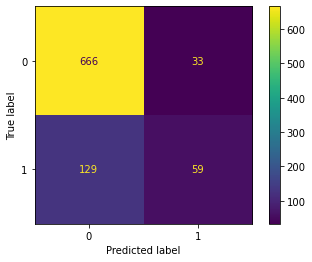

In [68]:
#plot cofusion matriks for Adaboost Classifier
plot_confusion_matrix(AB, X_test_final, y_test)  
plt.show()

# **9 - Cross Validation**

In [69]:
skfold = StratifiedKFold(n_splits=25)

for model in [logreg, SVM, dt, RF, knn, NB, AB, BC]:
    scores_train = cross_val_score(model, X_train_final, y_train, cv=skfold, scoring="accuracy")
    scores_test = cross_val_score(model, X_test_final, y_test, cv=skfold, scoring="accuracy")

    print((f'{model}').split('(')[0])
    print(f'train mean accuracy :', '{:.3f}'.format(np.mean(scores_train)), '| train std accuracy :', '{:.3f}'.format(np.std(scores_train)))
    print(f'test mean accuracy :', '{:.3f}'.format(np.mean(scores_test)), ' | test std accuracy :', '{:.3f}'.format(np.std(scores_test)))
    print()

LogisticRegression
train mean accuracy : 0.825 | train std accuracy : 0.035
test mean accuracy : 0.812  | test std accuracy : 0.056

SVC
train mean accuracy : 0.827 | train std accuracy : 0.038
test mean accuracy : 0.807  | test std accuracy : 0.064

DecisionTreeClassifier
train mean accuracy : 0.803 | train std accuracy : 0.041
test mean accuracy : 0.769  | test std accuracy : 0.064

RandomForestClassifier
train mean accuracy : 0.806 | train std accuracy : 0.041
test mean accuracy : 0.776  | test std accuracy : 0.063

KNeighborsClassifier
train mean accuracy : 0.807 | train std accuracy : 0.041
test mean accuracy : 0.795  | test std accuracy : 0.058

GaussianNB
train mean accuracy : 0.786 | train std accuracy : 0.046
test mean accuracy : 0.795  | test std accuracy : 0.084

AdaBoostClassifier
train mean accuracy : 0.823 | train std accuracy : 0.035
test mean accuracy : 0.814  | test std accuracy : 0.049

BaggingClassifier
train mean accuracy : 0.801 | train std accuracy : 0.038
test me

Cross validation adalah suatu metode tambahan dari teknik data yang bertujuan untuk memperoleh hasil akurasi yang maksimal. Metode ini sering juga disebut dengan k-fold cross validation dimana percobaan sebanyak k kali untuk satu model dengan parameter yang sama (Santosa dan Umam 2018) Dalam bukunya yang berjudul "Data Mining dan Big Data Analytics"

Secara umum, kita akan membandingkan n model dalam cross validation ini, dalam arti lain fungsi dari penggunaan metode cross validation adalah
1. Untuk mengetahui performa dari suatu model algoritma dengan melakukan percobaan sebanyak k kali
2. Untuk menningkatkan tingkat performansi dari model tersebut
3. Untuk mengolah data set dengan kelas yang seimbang

Dalam kasus klasifikasi, ada yang perlu diperhatikan dalam pembagian set data ke sejumlah k partisi, yaitu harus melakukan stratification  yang artinya kita akan mempartisi atau membagi set data tersebut ke k partisi dengan komposisi kelas yang seimbang disetiap partisinya. Dengan kata lain, distribusi kelas setiap partisi harus sama antar kelas, yang berarti juga sama dengan distribusi kelas di set data originalnya.

nilai cross validation yang mendekati satu mengartikan bahwa performa suatu model algoritma tersebut bagus atau cukup akurat dalam meprediksi suatu data. pada kasus ini dilakukan cross validation untuk melihat performa model yang baik/bagus dalam memprediksi default payment credit card.

berdasarkan nilai rata - rata acuracy data train dan test terdapat tiga model yang menghasilkan nilai akurasi paling tinggi, yaitu:
1. Model logistic reggression (train: 0.825, test: 0.812)
2. Model SVM (train: 0.827, test: 0.807)
3. Model Adaboost Classifier (Train: 0.823, test: 0.814)

perbedaan nilai rata - rata akurasi model svm pada train paling tinggi, akan tetapi memiliki perbedaan yang cukup jauh dengan data test. artinya performa model cukup baik dalam memprediksi data train tetapi tidak cukup baik dalam data test. berbeda dengan model logistic dan adaboost, kedua model tersebut memiliki perbedaan nilai yang tidak cukup jauh (jika dibandingkan dengan svm) dari data train dan test nya. meskipun demikian model ada boost menghasilkan nilai akurasi yang lebih tinggi dibanding model logistic pada data test. selain itu, model ada boost memiliki nilai std yang lebih sedikit dibandingkan dengan model logistic dimana nilai variansi atau std makin kecil maka model semakin memberikan nilai akurasi yang konsisten dalam memprediksi sesuatu. pada model ada boost memiliki nilai akurasi rata - rata sebesar 0.823 dengan std 0.035 pada data train dan 0.814 dengan std 0.049 pada data test artinya model ada boost konsiten memprediksi default 0 dan 1 dengan akurasi 0.823 pada data train dan 0.814 pada test.  oleh karena itu digunakan model ada boost classifier dalam menentukan default payment next month dari seorang customer.

# **10 - Hyperparameter**

pada kasus ini dilakukan penentuan hyperparameter bertujuan untuk menentukkan parameter mana yang paling bagus untuk digunakan oleh model ada boost clasifier.

In [70]:
params = {
    'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20],
    'learning_rate': [(0.97 + x / 100) for x in range(0, 8)],
    'algorithm': ['SAMME', 'SAMME.R']
}

In [71]:
AB = AdaBoostClassifier()
AB_grid = GridSearchCV(AB, params, cv=10, scoring='f1', return_train_score=True)
AB_grid.fit(X_train_final, y_train)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.97, 0.98, 0.99, 1.0, 1.01, 1.02,
                                           1.03, 1.04],
                         'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          20]},
             return_train_score=True, scoring='f1')

In [72]:
print('best params:', AB_grid.best_params_)
print('best score:', AB_grid.best_score_)

best params: {'algorithm': 'SAMME.R', 'learning_rate': 1.04, 'n_estimators': 3}
best score: 0.5022403995669645


Berdasarkan hasil dari hyper parameter didapat parameter alogritma dengan samme, learning_rate sebesar 1.02 dan n_estimator sebesar 8 mampu meningkatkan akurasi score dari model ada boost classifier.

In [79]:
#modeldefinition
ABC = AdaBoostClassifier(algorithm='SAMME.R', learning_rate=1.04, n_estimators=3)

#Model Training
ABC.fit(X_train_final, y_train)

# Predict Train-Set and Test-Set 
y_pred_train_ab = ABC.predict(X_train_final)
y_pred_test_ab = ABC.predict(X_test_final)

y_proba_train_ab = ABC.predict_proba(X_train_final)
y_proba_test_ab = ABC.predict_proba(X_test_final)

#Evaluate model logistic
print("Training")
print(classification_report(y_train,y_pred_train_ab))
print('ROC AUC Score:',roc_auc_score(y_train,y_proba_train_ab[:,1]))
print("\n===========================\n")
print("Test")
print(classification_report(y_test,y_pred_test_ab))
print('ROC AUC Score:',roc_auc_score(y_test,y_proba_test_ab[:,1]))

Training
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1624
           1       0.59      0.44      0.50       443

    accuracy                           0.81      2067
   macro avg       0.72      0.68      0.69      2067
weighted avg       0.80      0.81      0.80      2067

ROC AUC Score: 0.75518534065763


Test
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       699
           1       0.58      0.46      0.51       188

    accuracy                           0.81       887
   macro avg       0.72      0.68      0.70       887
weighted avg       0.80      0.81      0.81       887

ROC AUC Score: 0.7468115545003501


hyperparameter mampu meningkatkan nilai f1 score dari model adaboost classifier sehingga membuat model lebih sensitif dan akurat terhadap nilai default 1. akan tetapi tidak terlalu menambah secara secara signifikan nilai f1 score dari model adaboost sebelum dilakukan hyperparameter. hal ini dikarenakan data pada dataset tersebut imbalance dan jumlah dari default payment = 1 lebih kecil daripada jumlah default payment = 0 tersebut.

# **11 - Model Inference**

Pada kasus Model Ada Boost Classifier akan dicobakan pada data random pada data set yang telah dipisahkan dari dataset dan pada data yang baru.

## Try to Sample Data Random

In [74]:
#Model Inference for 10 data random/sample

# feature scalling for data inference
inf_num_scaled = scaler.transform(data_inf[num_columns])
inf_num_scaled_ok = pd.DataFrame(inf_num_scaled).reset_index(drop=True)

#feature encoding for data inference
inf_cat_encoded = encoder.transform(data_inf[cat_columns]).toarray()
inf_cat_encoded_ok = pd.DataFrame(inf_cat_encoded).reset_index(drop=True)

#combine data inference numerical and categorical
inf_final = pd.concat([inf_num_scaled_ok, inf_cat_encoded_ok], axis=1)

#predict price from data inference
pred_res = SVM.predict(inf_final)
default_inf = pd.DataFrame(pred_res, columns=['Default Payment Credit Card (Prediksi)']).reset_index(drop=True)
default = pd.DataFrame(data_inf['default_payment_next_month']).reset_index(drop=True)
default_final = pd.concat([default, default_inf], axis=1)
default_final

,default_payment_next_month,Default Payment Credit Card (Prediksi)
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
5,1,0
6,1,1
7,0,0
8,1,0
9,0,0


## TRY ALL MODEL TO NEW DATA

In [75]:
New_data = pd.DataFrame(np.array([[23000, 'late pay', 'late pay', 'completed', 'completed', 'late pay', 'minimun payment'], 
                                  [500000, 'late pay', 'late pay', 'late pay', 'minimun payment', 'late pay', 'minimun payment'], 
                                  [600000, 'completed', 'late pay', 'completed', 'completed', 'completed', 'minimun payment'], 
                                  [14000, 'late pay', 'late pay', 'late pay', 'late pay', 'late pay', 'late pay'], 
                                  [32000, 'completed', 'completed', 'completed', 'completed', 'completed', 'minimun payment'], 
                                  [32000, 'late pay', 'completed', 'completed', 'completed', 'completed', 'late pay'],
                                  [120000, 'completed', 'minimun payment', 'late pay', 'completed', 'late pay', 'minimun payment'],
                                  [64000, 'minimun payment', 'minimun payment', 'late pay', 'late pay', 'late pay', 'minimun payment'],
                                  [76000, 'late pay', 'minimun payment', 'completed', 'late pay', 'late pay', 'completed']]),
                   columns=['limit_balance', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6'])
New_data

,limit_balance,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
0,23000,late pay,late pay,completed,completed,late pay,minimun payment
1,500000,late pay,late pay,late pay,minimun payment,late pay,minimun payment
2,600000,completed,late pay,completed,completed,completed,minimun payment
3,14000,late pay,late pay,late pay,late pay,late pay,late pay
4,32000,completed,completed,completed,completed,completed,minimun payment
5,32000,late pay,completed,completed,completed,completed,late pay
6,120000,completed,minimun payment,late pay,completed,late pay,minimun payment
7,64000,minimun payment,minimun payment,late pay,late pay,late pay,minimun payment
8,76000,late pay,minimun payment,completed,late pay,late pay,completed


- AdaboostClassifier

In [85]:
# feature scalling for data inference
new_num_scaled = scaler.transform(New_data[num_columns])
new_num_scaled_ok = pd.DataFrame(new_num_scaled).reset_index(drop=True)

#feature encoding for data inference
new_cat_encoded = encoder.transform(New_data[cat_columns]).toarray()
new_cat_encoded_ok = pd.DataFrame(new_cat_encoded).reset_index(drop=True)

#combine data inference numerical and categorical
new_final = pd.concat([new_num_scaled_ok, new_cat_encoded_ok], axis=1)

#predict price from data inference
pred_res = ABC.predict(new_final)
default_inf = pd.DataFrame(pred_res, columns=['Default Payment Credit Card (Prediksi)']).reset_index(drop=True)
default_final = pd.concat([New_data, default_inf], axis=1)
default_final

,limit_balance,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,Default Payment Credit Card (Prediksi)
0,23000,late pay,late pay,completed,completed,late pay,minimun payment,1
1,500000,late pay,late pay,late pay,minimun payment,late pay,minimun payment,1
2,600000,completed,late pay,completed,completed,completed,minimun payment,0
3,14000,late pay,late pay,late pay,late pay,late pay,late pay,1
4,32000,completed,completed,completed,completed,completed,minimun payment,0
5,32000,late pay,completed,completed,completed,completed,late pay,1
6,120000,completed,minimun payment,late pay,completed,late pay,minimun payment,0
7,64000,minimun payment,minimun payment,late pay,late pay,late pay,minimun payment,0
8,76000,late pay,minimun payment,completed,late pay,late pay,completed,1


In [93]:
new_final

,0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.025243,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.951456,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.145631,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.007767,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.042718,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5,0.042718,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6,0.213592,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7,0.104854,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8,0.128155,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [86]:
#save model, scaling, and encoding for deployment
pickle.dump(ABC, open('AB.pkl', 'wb'))
pickle.dump(scaler, open('num_inf.pkl', 'wb'))
pickle.dump(encoder, open('encoded_inf.pkl', 'wb'))

# **12 - Conceptual Problem**

Soal:
1. Apakah fungsi parameter criterion pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!
2. Apakah fungsi dari pruning pada Tree model?
3. Bagaimana cara memilih K yang optimal pada KNN?
4. Jelaskan apa yang kalian ketahui tentang Cross Validation!
5. Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 Score!

Jawaban: 
1. criterion merupakan salah satu parameter yang terdapat pada model decision tree yang digunakan untuk memisahkan masing - masing atribut. berikut jenis - jenis criterion yang terdapat pada desicion tree:
- Information_gain : criteria ini menghitung entropi dari semua atribut dan yang memiliki nilai entropi paling sedikit dipilih untuk di pisah. Kriteria ini memiliki bias terhadap pemilihan atribut yang memiliki jumlah nilai yang besar.
- Gain_ratio : criteria ini melakukan penyesuaian informasi untuk setiap atribut untuk memungkinkan luas dan keseragaman atribut.
- Gini_index : criteria ini mengukur ketidaksetaraan antara distribusi karakteristik label. Pemisahan pada Atribut yang dipilih menghasilkan pengurangan indeks gini rata-rata dari himpunan bagian yang dihasilkan
- Akurasi : criteria ini memilih atribut yang akan dipisahkan yang dapat memaksimalkan akurasi seluruh tree.
- Least_square : criteria ini memilih atribut untuk dipecah, yang meminimalkan jarak kuadrat antara rata-rata nilai dalam node sehubungan dengan nilai sebenarnya

2. pruning pada tree berfungsi sebagai mengidentifikasikan dan membuang cabang yang tidak diperlukan pada tree di decision tree yang telah terbentuk. Hal ini dikarenakan tree tersebut memiliki keputusan yang dikontruksi dapat berukuran besar, maka dapat disederhanakan dengan melakukan pemangkasan berdasarkan nilai kepercayaan (confident level).

3. Dalam memilih k yang optimal pada KNN perlu diperhatika jumlah klasifikasi data. jika jumlah klasifikasi data genap, maka k yang optimal digunakan adalah k yang bernilai ganjil dan jika jumlah klasifikasi data ganjil, maka yang paling optimal yang digunakan adalah k yang bernilai genap. hal ini bertujuan untuk menghindari kesamaan jarak data yang muncul saat model KNN di jalankan.

4. Cross validation adalah suatu metode tambahan dari teknik data yang bertujuan untuk memperoleh hasil akurasi yang maksimal. Metode ini sering juga disebut dengan k-fold cross validation dimana percobaan sebanyak k kali untuk satu model dengan parameter yang sama (Santosa dan Umam 2018) Dalam bukunya yang berjudul "Data Mining dan Big Data Analytics"

Secara umum, kita akan membandingkan n model dalam cross validation ini, dalam arti lain fungsi dari penggunaan metode cross validation adalah
1. Untuk mengetahui performa dari suatu model algoritma dengan melakukan percobaan sebanyak k kali
2. Untuk menningkatkan tingkat performansi dari model tersebut
3. Untuk mengolah data set dengan kelas yang seimbang

Dalam kasus klasifikasi, ada yang perlu diperhatikan dalam pembagian set data ke sejumlah k partisi, yaitu harus melakukan stratification  yang artinya kita akan mempartisi atau membagi set data tersebut ke k partisi dengan komposisi kelas yang seimbang disetiap partisinya. Dengan kata lain, distribusi kelas setiap partisi harus sama antar kelas, yang berarti juga sama dengan distribusi kelas di set data originalnya.

5. 
- matriks precision merupakan matriks yang digunakan untuk menghitung semua hasil pengamatan yang benar (TP, FP) dari seluruh hasil pengamatan. biasanya digunakan untuk melihat berapa banyak nilai peluang kemunculan hasil prediksi yang bernilai false positif (FP) pada suatu model. semakin tinggi nilai presicion maka kemuculan false positif semakin kecil
- recall merupakan matriks yang digunakan menghitung hasil pengamatan True positive dari total pengamatan di kelas yes (TP, FN). biasanya digunakan untuk melihat berapa banyak nilai peluang kemunculan hasil prediksi yang bernilai false positif (FN) pada suatu model. semakin tinggi nilai recall maka kemuculan false negatif semakin keci
-  F1 - score merupakan matriks yang digunakan untuk menghitung presentasi dari hasil pengamatan pada matriks recall dan presicion. semakin tinggi nilai f1 scorenya, maka semakin kecil nilai rata - rata dari false negatif dan false positif. hal ini dikarenakan f1 score digunakan untuk melihat rata - rata nilai keduanya (false negatif atau false positif)
- matriks accuracy merupakan matriks yang digunakan untuk melihat tingkat keakurasi atau seberapa tepat model itu dalam memprediksi. 
(sumber: https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/).

# **13 - Conclusion and Overall Analysis**

Credit card merupakan salah metode pembayaran cicilan  yang dilakukan seseorang ketika berbelanja atau membeli suatu barang yang diinginkan. setiap kartu kredit atau credit card memiliki limit tertentu. limit tersebut ditentukan oleh perusahan credit card atau bank berdasarkan faktor tertentu. menurut salah satu bank (sumber: https://www.ocbcnisp.com/id/article/2021/10/11/limit-kartu-kredit), limit credit ditentukkan berdasarkan saldo rekening, riwat keuangan, pendapatan atau gaji, status kepemilikkan rumah, jumlah hutang, dan jumlah pengajuan. setelah semua faktor tersebut, maka seseorang akan mendapatkan limit credit card. akan tetapi limit kartu kredit tersebut akan bertambah apabila seseorang membayar tepat waktu setiap cicilannya per bulan. 

selain itu, ada kemungkinan customer dari kartu kredit lupa atau sengaja tidak membayar cicilan kartu kreditnya per bulan. hal ini dikarenakan keadaan ekonomi dari customer itu sendiri yang sedang tidak baik - baik aja. sehingga membuat customer melakukan keterlambatan pembayaran atau yang sering dikenal dengan tunggakan kartu kredit. apakah kartu kredit dari customer tersebut langsung default atau tidak?.

menurut salah satu website bank (sumber: https://www.bankrate.com/finance/credit-cards):
*"Default happens after missing a payment for 30 days. Default usually happens after six months in a row of not making at least the minimum payment due, which means your credit card is seriously delinquent. During that time you will be contacted by your creditor and they will want to know what you’re going to do about it. If they are not satisfied with your response (or the lack thereof), the account will be closed and after 180 days with no payment, reported as charged off to the credit bureaus."*

jika dibahasa indonesiakan, maka berbunyi demikian:
"Kartu kredit yang di default (*default payment: yes*) oleh pihak bank akan terjadi jika customer tersebut tidak melakukan pembayaran cicilan setelah satu bulan. akan tetapi, biasanya default kartu kredit terjadi setelah enam bulan customer tersebut tidak sama sekali membayaran cicilan kartu kredit bahkan pembayaran minimun dari kartu kredit tersebut tidak dibayarkan oleh customer. selama masa default, customer akan dikontak oleh pihak perusahaan dan diminta penjelasan "mengapa tidak membayar cicilan kartu kredit selama enam bulan?". jika customer menjawab dengan jawaban yang tidak memuaskan bagi pihak kartu kredit, maka kartu kredit tersebut ditutu oleh pihak perusahaan sampai waktu yang ditentukan."

berdasarkan informasi tersebut, default payment kartu kredit hanya terjadi jika customer melakukan tunggakan pembayaran kartu kredit. dengan kata lain, default payment yes or no tidak dipengaruhi oleh limit kartu kredit, pembayaran cicilan per bulan, total bill kartu kredit, usia bahkan level pendidikan. hal ini dikarenakan informasi tersebut tidak akan membuat default payment yes or no jika customer tersebut tidak melakukan tunggakan atau keterlambatan pembayaran.

Pada kasus ini akan dibuat suatu model untuk meringan beban pekerjaan divisi marketing dan sales kartu kredit dalam menentukan kartu kredit customer mana yang harus didefault 1 (tidak bisa digunakan kembali) dan mana yang didefault nol (dapat digunakan kembali). untuk mempermudah model dalam mempelajari pola tersebut perlu dilakukan seleksi feature untuk mengurangi feature - feature yang tidak penting dalam model tersebut.

berdasarka informasi diatas,maka dalam memprediksi default payment kartu kredit customer hanya diperlukan kolom yang menginformasikan status pembayaran customer seperti pembayaran cicilan telah telat dibayarkan selama 3 bulan, dsb. pada dataset, informasi tersebut tertera pada kolom pay_0, pay_2, pay_3, pay_4, pay_5, dan pay_6. kolom tersebut berisikan status keterlambatan atau ketepatan customer dalam membayar kartu kredit. kolom tersebut berisikan data numerical dari -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, dst. nilai - nilai mengandung arti sebagai berikut: -1=  pembayaran sewajarnya, 1=tunggakan 1 bulan, 2=tunggakan 2 bulan, ... 8=tunggakan 8 bulan, 9=tunggakan 9 bulan and above. akan tetapi, limit_ balance, total tagihan, dan umur dapat memengaruhi default payment next month kartu kredit customer. untuk melihat dilakukan visualisasi data mengunakan barplot dan didapat hasil sebagai berikut:
1. Berdasarkan grafik tersebut didapat bahwa pada umumnya kartu kredit yang di default oleh perusahan kartu kredit merupakan customer yang memiliki usia sekitar 40 tahun dan berjenis kelamin laki - laki. hal ini dikarenakan laki - laki pada rentang usia tersebut merupakan usia yang tidak terlalu produktif, memiliki tanggung jawab, dan membuka usaha sendiri. selain itu, pada umumnya usia tersebut banyak yang mengalami kesusahan dalam hal keuangan.
2. bill amt 1 merupakan total tagihan dari bulan sebelumnya (april - agustus) yang belum dibayar ditambah tagihan bulan ini (september). hal ini didapat dari informasi sumber dataset tersebut yaitu biqguery. oleh karena itu, bill amt 1 di pakai untuk melihat hubungan antara total tagihan dengan default payment. Berdasarkan grafik tersebut didapat bahwa total tagihan seorang customer tidak berpengaruh pada kartu kredit di blokir atau tidak. jika seorang customer memili total tagihan yang besar dan customer tersebut rajin membayar cicilan per bulan, maka kartu kredit customer tersebut tidak didefault oleh perusahaan. akan tetapi, jika customer memiliki tagihan yang sedikit  tapi customer tersebut tidak membayar cicilan per bulan, maka customer tersebut akan didefault kartu kreditnya oleh perusahan.
3. Berdasarkan grafik tersebut didapat bahwa limit balance memiliki pengaruhi terhadap default payment next month. meskipun pada kenyataan tidak. jika seorang customer memiliki limit balance yang tinggi tetapi tidak mengunakan kartu kredit pada bulan sebelumnya, maka customer akan di default untuk tidak membayar cicilan. akan tetapi, customer yang memiliki limit kredit rendah merupakan customer yang berada pada kelas ekonomi menengah ke rendah. oleh karena itu, banyak customer tersebut yang memanfaatkan kartu kredit untuk memenuhi kebutuhan mereka tanpa memikirkan mereka mampu bayar cciilan atau tidak.  hal ini terlihat pada grafik tersebut, rata - rata customer yang didefault untuk tidak membayar cicilan kartu kredit pada bulan depan memiliki limit balance yang tinggi. untuk memastikan hubungan tersebut perlu dilakukan uji korelasi melalui heatmap.
4. berdasarkan grafik tersebut tidak memperlihatkan bahwa adanya pengaruh status pembayaran dengan default  kartu kredit pada bulan depan. berdasarkan informasi dataset, jika status pembayaran customer tersebut 0, -1, -2 artinya customer tersebut membayar cicilan secara teratur per bulan nya sehingga pihak perusahan di melakukan default pada kartu kredit customer tersebut. jika status pembayaran customer 1 - 8 artinya customer tersebut melakukan tunggakan atau pending payment terhadap cicilan kartu kredit sehingga pihak perusahan melakukan default kartu kredit terhadap customer tersebut. hal ini diperlihatkan pada grafik tersebut bahwa status kurang 1 didefault 0 (tidak diblokir) dan status lebih dari 1 di dedefault 1 (diblokir).

berdasarkan informasi tersebut, dapat disimpulkan bahwa kolom limit_balance, sex, education_level, marital_status, age, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, dan pay_amt_6 tidak diperlukan dalam memprediksi default payment customer. sehingga kolom - kolom dapat direduksi untuk mempermudah dalam menganalisis data dan menentukan pola data yang terjadi untuk default payment yes (1) dan default payment no (0). oleh karena itu dilakukan uji korelasi mengunakan heatmap dalam memprediksi feature tersebut.

Pada grafik heatmap membuktikan bahwa default payment pada kartu kredit hanya terjadi jika customer melakukam tunggakan atau keterlambatan saat membayar cicilan kartu kredit. hal ini terlihat pada nilai korelasi pada kolom pay_0, pay_2, pay_3, pay_4, pay_5, dan pay_6 yang cukup tinggi (mendekati positif 1) dibanding feature yang lain terhadap target (default_payment_next_month). pada uji korelasi heatmap menghasilkan range nilai dari -1 sampai 1. jika feature tersebut memperoleh nilai -1 terhadap feature lain atau target, maka feature tersebut memiliki hubungan yang sangat kuat tetapi berbanding terbalik terhadap feature atau target tersebut. jika feature tersebut memperoleh nilai 1 terhadap feature lain atau target, maka feature tersebut memiliki hubungan yang sangat kuat dan berbanding lurus terhadap feature yang lain atau target.

pada kasus ini feature pay_0, pay_2, pay_3, pay_4, pay_5, dan pay_6 memiliki nilai yang cukup tinggi terhadap target. nilai tersebut diantara: pay_0 memperoleh nilai 0.45, pay_2 memperoleh nilai 0.46, pay_3 memperoleh niai 0.36, pay_4 memperoleh nilai 0.33, pay_5 memperoleh nilai 0.32, dan pay_6 memperoleh nilai 0.39 terhadap target. hal tersebut membuktikan bahwa seorang customer akan di default kartu kreditnya jika customer melakukan tunggakan atau keterlambatan saat membayar cicilan. selain itu, limit balance, total bill (bill_amt_1 - bill_amt_6), pembayaran cicilan perbulan (pay_amt_1 - pay_amt_6), sec, tingkat pendidikan, dan martial status tidak memengaruhi sebuah perusahaan untuk melakukan default kartu kredit customer. meskipun customer tersebut memiliki tingkat pendidikkan rendah dengan status telah menikah, memiliki limit kredit yang tinggi dan menghabiskan limit kredit tersebut untuk belanja pada bulan tersebut, selama customer tersebut bisa membayar secara teratur cicilan kartu kredit tanpa tunggakan maka kartu kredit customer tersebut tidak akan didefault oleh pihak kartu kredit begitu sebaliknya.

selain itu, dipilih limit balance dengan nilai korelasi 0.2. feature ini dipilih karena limit balance memiliki hubungan default payment. ketika customer belanja melebihi dari limit kartu kredit yang dimiliki oleh customer, maka customer tersebut di default oleh pihak perusahan untuk tidak dapat digunakan dalam jangka waktu tertentu. jadi, pada pembuatan model prediksi default payment kartu kredit hanya di perlukan feature limit_balance, pay_0, pay_2, pay_3, pay_4, pay_5, dan pay_6. 

selanjutnya dilakukan handling outlier pada feature limit balance. hal ini dikarenakan feature limit terdapat beberapa nilai yanng jarak cukup jauh dari nilai - nilai lainnya. selain itu, grafik limit balance yang berada pada distribusi yang cukup skew tapi tidak terlalu ekstrim. hasil yang didapat adalah nilai skew ynag lebih rendah dan tidak terdapat nilai outlier.

kemudian dilakukan feature scaling pada numerical dan feature encoding pada categorical. hal ini bertujuan agar dataset dalam bentuk yang lebih sederhana sehingga memudahkan model dalam mempelajari data tersebut. feature scaling dan encoding merupakan tahapan terakhir yang dilakukan sebelum data dimasukkan kedalam model.

selanjutnya data dimasukkan kedalam 8 model. hal ini bertujuan untuk dapat membandingkan model mana yang memiliki performa paling dalam menentukan default payment 0 dan 1.

pada kasus ini diharapkan model ini mampu membedakan 0 dan 1. positif pada kasus ini adalah 1 (kartu kredit di default). jika model tersebut lebih banyak memprediksi false positif, maka dapat merugikan perusahan karena jika model menebak diblokir padahal tidak diblokir, maka customer menjadi tidak puas dan dapat menyebabkan customer yang rajin bayar cicilan pindah ke bank/perusahan kredit lain sehingga perusahan mengalami customer tersebut. jika model tersebut banyak menebak false negatif, maka perusahaan juga dapat dirugikan. ketika customer yang sering telat bayar atau melakukan tunggakan dan kartu kreditnya tidak diblokir, maka customer tersebut bisa belanja terus dan hal tersebut membuat perusahan mengalami kerugian besar. oleh karena itu, pada kasus ini tidak diharapkan nilai FN (false negatif) atau FP (false positif) melainkan diharapkan model mampu memprediksi dengan benar 0 dan 1 serta mampu mebedakan 0 dan 1 secara akurat.

untuk mengetahui hal tersebut, dilihat nilai f1 score, accuracy, dan roc auc score. f1 score untuk mengetahui presentasi prediksi 0 dan 1 secara benar. accuracy untuk melihat seberapa tepat model dalam memprediksi default payment kartu kredit customer. roc auc score untuk mengetahui seberapa tepat model dalam membedakan default 0 dan 1. nilai f1 score, accuracy, dan roc auc score yang mendekati 1 maka model tersebut mampu memprediksi default payment kartu kredit customer. selain itu, nilai f1 score melihat kemungkinan banyaknya nilai True Positif (TP) dan True Negatif (TN) yag diperiksi oleh model tersebut.  selain itu, nilai f1 score digunakan untuk melihat kemungkinan false positif dan false negatif (nilai f1 score semakin besar, maka kemungkinan muncul rata - rata nilai prediksi false positif dan negatif semakin kecil).

Perbedaan yang cukup signifikan nilai f1 score default 0 dan default 1 mengartikan bahwa model yang digunakan lebih mudah mempelajari perilaku data default = 0 dibandingkan dengan default = 1. berikut hasil evaluasi yang didapat dari nilai roc auc score dan f1 score:
1. pada model logistic reggression, didapat nilai f1 score train untuk default 0 (0.90), default 1 (0.47) dan f1 score test untuk default 0 (0.89), default 1 (0.42). hal ini dapat mengartikan bahwa model tersebut bagus dalam memprediksi default 0 daripada default 1 (terlihat perbedaan f1 score default 1 yang berbeda antara train dan test). selain itu, nilai tersebut menginfokan adanya data imbalance pada default 0 dan 1. nilai roc auc score train untuk default 0 (0.77) dan test (0.76). hal ini mengartikan bahwa model cukup konsisten dalam memprediksi default 0 dan default 1 secara tepat. oleh karena itu model itu udah cukup baik dalam memprediksi default 0 dan default 1.
2. pada model svm, didapat nilai f1 score train untuk default 0 (0.90), default 1 (0.54) dan f1 score test untuk default 0 (0.89), default 1 (0.48). secara nilai model ini lebih baik dalam memprediksi default 1 daripada model logistic reggresiaon. akan tetapi, masih terlihat nilai yang tidak konsisten pada data train dan data test untuk default 1 (perbedaan yang cukup signifikan). selain itu, nilai tersebut menginfokan adanya data imbalance pada default 0 dan 1. Meskipun demikian model tersebut kurang dapat membedakan atau membaca pola antara 0 dan 1 terlihat dari nilai roc auc score train untuk default 0 (0.70) dan test (0.64). hal ini mengartikan bahwa model tidak cukup konsisten dalam memprediksi default 0 dan default 1 secara tidak tepat. oleh karena itu model itu  tidak cukup baik dalam memprediksi default 0 dan default 1 dibanding model sebelumnya.
3. pada model desicion tree, didapat nilai f1 score train untuk default 0 (0.90), default 1 (0.68) dan f1 score test untuk default 0 (0.87), default 1 (0.43). secara nilai model ini lebih baik dalam memprediksi default 1 daripada model logistic reggresiaon dan svm. akan tetapi, masih terlihat nilai yang tidak konsisten pada data train dan data test untuk default 1 (perbedaan yang cukup sangat signifikan). selain itu, nilai tersebut menginfokan adanya data imbalance pada default 0 dan 1. Meskipun demikian model tersebut kurang dapat membedakan atau membaca pola antara 0 dan 1 terlihat dari nilai roc auc score train untuk default 0 (0.91) dan test (0.67). hal ini mengartikan bahwa model tidak cukup konsisten dalam memprediksi default 0 dan default 1 secara tidak tepat. oleh karena itu model itu tidak cukup baik dalam memprediksi default 0 dan default 1 dibanding model sebelumnya.
4. pada model random forest, didapat nilai f1 score train untuk default 0 (0.93), default 1 (0.70) dan f1 score test untuk default 0 (0.88), default 1 (0.47). secara nilai model ini lebih baik dalam memprediksi default 1 daripada model logistic reggresiaon, svm, dan desicion tree. akan tetapi, masih terlihat nilai yang tidak konsisten pada data train dan data test untuk default 1 (perbedaan yang cukup sangat signifikan). selain itu, nilai tersebut menginfokan adanya data imbalance pada default 0 dan 1. Meskipun demikian model tersebut kurang dapat membedakan atau membaca pola antara 0 dan 1 terlihat dari nilai roc auc score train untuk default 0 (0.90) dan test (0.71). hal ini mengartikan bahwa model tidak cukup konsisten dalam memprediksi default 0 dan default 1 secara tidak tepat. oleh karena itu model itu tidak cukup baik dalam memprediksi default 0 dan default 1 dibanding model sebelumnya.
5. pada model knn, didapat nilai f1 score train untuk default 0 (0.91), default 1 (0.55) dan f1 score test untuk default 0 (0.89), default 1 (0.46). secara nilai model ini lebih baik dalam memprediksi default 1 daripada model logistic reggresiaon, svm, dan desicion tree tetapi kurang baik terhadap model random forest. akan tetapi, masih terlihat nilai yang tidak konsisten pada data train dan data test untuk default 1 (perbedaan yang cukup sangat signifikan). selain itu, nilai tersebut menginfokan adanya data imbalance pada default 0 dan 1. Meskipun demikian model tersebut kurang dapat membedakan atau membaca pola antara 0 dan 1 terlihat dari nilai roc auc score train untuk default 0 (0.80) dan test (0.71). hal ini mengartikan bahwa model tidak cukup konsisten dalam memprediksi default 0 dan default 1 secara tidak tepat. oleh karena itu model itu tidak cukup baik dalam memprediksi default 0 dan default 1 dibanding model sebelumnya.
6. pada model naive bayes, didapat nilai f1 score train untuk default 0 (0.91), default 1 (0.55) dan f1 score test untuk default 0 (0.89), default 1 (0.46). secara nilai model ini lebih baik dalam memprediksi default 1 daripada model logistic reggresiaon, svm, dan desicion tree tetapi mirip dengan model knn dan kurang baik terhadap model random forest. akan tetapi, masih terlihat nilai yang tidak konsisten pada data train dan data test untuk default 1 (perbedaan yang cukup sangat signifikan). selain itu, nilai tersebut menginfokan adanya data imbalance pada default 0 dan 1. Meskipun demikian model tersebut kurang dapat membedakan atau membaca pola antara 0 dan 1 terlihat dari nilai roc auc score train untuk default 0 (0.80) dan test (0.71). hal ini mengartikan bahwa model tidak cukup konsisten dalam memprediksi default 0 dan default 1 secara tidak tepat. oleh karena itu model itu tidak cukup baik dalam memprediksi default 0 dan default 1 dibanding model sebelumnya.
7. pada model bagging classifier, didapat nilai f1 score train untuk default 0 (0.91), default 1 (0.55) dan f1 score test untuk default 0 (0.89), default 1 (0.46). secara nilai model ini lebih baik dalam memprediksi default 1 daripada model logistic reggresiaon, svm, dan desicion tree tetapi mirip dengan model knn dna naive bayes dan kurang baik terhadap model random forest. akan tetapi, masih terlihat nilai yang tidak konsisten pada data train dan data test untuk default 1 (perbedaan yang cukup sangat signifikan). selain itu, nilai tersebut menginfokan adanya data imbalance pada default 0 dan 1. Meskipun demikian model tersebut kurang dapat membedakan atau membaca pola antara 0 dan 1 terlihat dari nilai roc auc score train untuk default 0 (0.80) dan test (0.71). hal ini mengartikan bahwa model tidak cukup konsisten dalam memprediksi default 0 dan default 1 secara tidak tepat. oleh karena itu model itu tidak cukup baik dalam memprediksi default 0 dan default 1 dibanding model sebelumnya.
8. pada model bagging classifier, didapat nilai f1 score train untuk default 0 (0.90), default 1 (0.47) dan f1 score test untuk default 0 (0.89), default 1 (0.42). secara nilai model ini kurang baik dalam memprediksi default 1 daripada model knn, svm, desicion tree, random forest, dan naive bayes tetapi mirip dengan model logistic reggression. akan tetapi, masih terlihat nilai yang tidak konsisten pada data train dan data test untuk default 1 (perbedaan yang cukup sangat signifikan). selain itu, nilai tersebut menginfokan adanya data imbalance pada default 0 dan 1. Meskipun demikian model tersebut kurang dapat membedakan atau membaca pola antara 0 dan 1 terlihat dari nilai roc auc score train untuk default 0 (0.78) dan test (0.77). hal ini mengartikan bahwa model cukup konsisten dalam memprediksi default 0 dan default 1 secara tidak tepat. oleh karena itu model itu cukup baik dalam memprediksi default 0 dan default 1 dibanding model sebelumnya.

nilai evaluasi disebabkan oleh beberapa faktor seperti:
1. data yang imbalance. terlihat pada grafik dibawah.

<AxesSubplot:xlabel='default_payment_next_month', ylabel='count'>

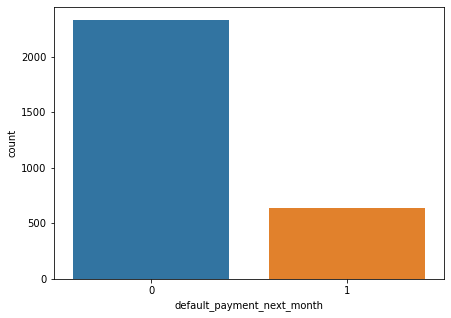

In [77]:
plt.figure(figsize=(7, 5))
sns.countplot(x=data['default_payment_next_month'])

menurut sumber https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data, handling data imbalance hanya dilakukan pada data - data yang memiliki perbedaan yang sangat signifikan (data imbalance ekstrim dengan perbandingan nilai 0 : nilai 1 = 1 : 100 atau <1% dari data set). selain dari itu, handling data imbalance tidak berdampak apa - apa terhadap performa model tersebut. oleh karena itu, pada kasus ini tidak dilakukan handling data imbalance karena balacing datannya tidak terlalu ekstrim.

2. terdapat data anomali pada dataset. hal ini dikarenakan terjadi kesalahan dalam penginputan data sehingga yang seharusnya default = 0 malah default = 1 untuk nilai pay_0, pay_2, pay_3, pay_4, pay_5, dan pay_6 = 0. akan tetapi jumlah data tersebut tidak banyak atau dengan kata lain hanya beberapa data. hal ini terlihat pada index 1323 pada dataset dibawah ini.

In [78]:
data[(data['pay_0'] == 0) & (data['pay_2'] == 0) & (data['pay_3'] == 0) & (data['pay_4'] == 0) & (data['pay_5'] == 0) & (data['pay_6'] == 0)]

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,...,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,...,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,...,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0
6,220000.0,1,1,2,38.0,0.0,0.0,0.0,0.0,0,...,198681.0,202479.0,206221.0,7705.0,9656.0,7189.0,7404.0,7490.0,7517.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1320,160000.0,1,2,1,32.0,0.0,0.0,0.0,0.0,0,...,98768.0,101016.0,103176.0,4500.0,4500.0,4000.0,4000.0,4000.0,4000.0,0
1321,60000.0,2,2,2,30.0,0.0,0.0,0.0,0.0,0,...,40548.0,40580.0,40416.0,3205.0,2850.0,1578.0,1580.0,1416.0,2512.0,0
1322,60000.0,2,2,1,26.0,0.0,0.0,0.0,0.0,0,...,24914.0,25408.0,25941.0,1524.0,1403.0,1500.0,908.0,941.0,946.0,0
1323,120000.0,2,2,2,27.0,0.0,0.0,0.0,0.0,0,...,20129.0,10388.0,13316.0,1137.0,1514.0,1069.0,278.0,3000.0,0.0,1


Selain itu dilakukan evaluasi mengunakan cross validation untuk menentukan model mana yang memiliki performa paling baik/bagus. Cross validation adalah suatu metode tambahan dari teknik data yang bertujuan untuk memperoleh hasil akurasi yang maksimal. Metode ini sering juga disebut dengan k-fold cross validation dimana percobaan sebanyak k kali untuk satu model dengan parameter yang sama (Santosa dan Umam 2018) Dalam bukunya yang berjudul "Data Mining dan Big Data Analytics"

Secara umum, kita akan membandingkan n model dalam cross validation ini, dalam arti lain fungsi dari penggunaan metode cross validation adalah
1. Untuk mengetahui performa dari suatu model algoritma dengan melakukan percobaan sebanyak k kali
2. Untuk menningkatkan tingkat performansi dari model tersebut
3. Untuk mengolah data set dengan kelas yang seimbang

Dalam kasus klasifikasi, ada yang perlu diperhatikan dalam pembagian set data ke sejumlah k partisi, yaitu harus melakukan stratification  yang artinya kita akan mempartisi atau membagi set data tersebut ke k partisi dengan komposisi kelas yang seimbang disetiap partisinya. Dengan kata lain, distribusi kelas setiap partisi harus sama antar kelas, yang berarti juga sama dengan distribusi kelas di set data originalnya.

nilai cross validation yang mendekati satu mengartikan bahwa performa suatu model algoritma tersebut bagus atau cukup akurat dalam meprediksi suatu data. pada kasus ini dilakukan cross validation untuk melihat performa model yang baik/bagus dalam memprediksi default payment credit card.

berdasarkan nilai rata - rata acuracy data train dan test terdapat tiga model yang menghasilkan nilai akurasi paling tinggi, yaitu:
1. Model logistic reggression (train: 0.825, test: 0.812)
2. Model SVM (train: 0.827, test: 0.807)
3. Model Adaboost Classifier (Train: 0.823, test: 0.814)

perbedaan nilai rata - rata akurasi model svm pada train paling tinggi, akan tetapi memiliki perbedaan yang cukup jauh dengan data test. artinya performa model cukup baik dalam memprediksi data train tetapi tidak cukup baik dalam data test. berbeda dengan model logistic dan adaboost, kedua model tersebut memiliki perbedaan nilai yang tidak cukup jauh (jika dibandingkan dengan svm) dari data train dan test nya. meskipun demikian model ada boost menghasilkan nilai akurasi yang lebih tinggi dibanding model logistic pada data test. selain itu, model ada boost memiliki nilai std yang lebih sedikit dibandingkan dengan model logistic dimana nilai variansi atau std makin kecil maka model semakin memberikan nilai akurasi yang konsisten dalam memprediksi sesuatu. pada model ada boost memiliki nilai akurasi rata - rata sebesar 0.823 dengan std 0.035 pada data train dan 0.814 dengan std 0.049 pada data test artinya model ada boost konsiten memprediksi default 0 dan 1 dengan akurasi 0.823 pada data train dan 0.814 pada test.  oleh karena itu digunakan model ada boost classifier dalam menentukan default payment next month dari seorang customer.

setelah dipilih satu model dengan performa paling baik, maka selanjutnya dilakukan penentuan parameter paling bagus untuk model adaboostclasifier. hal ini bertujuan agar dapat meningkat performa model tersebut. parameter yang terbaik untuk model ada boost adalah sebagai berikut:
1. algorithm : 'SAMME'
2. learning_rate : 1.02,
3. n_estimators': 8

diharapkan mengunakan parameter tersebut mendapatkan nilai f1 score  model yang lebih bagus. akan tetapi, terdapat perbedaan nilai roc auc score yang lebih sedikit (jika dibanding dengan model adaboost yang tidak dilakukan hyper parameter) dengan nilai roc train 0.759 dan roc test 0.755. artinya model ada boost lebih akurat dalam membedakan nilai default 0 dan 1 sehingga dapat menghasilkan hasil prediksi yang tepat dan akurat. akan tetapi nilai f1 score pada default 1 pada train dan test (train: 0.45, test: 0.39) lebih kecil jika dibandingkan dengan model ada boost sebelum dilakukan hyper parameter. artinya prediksi benar terhadap nilai default=1 menghasilkan kemungkinan lebih kecil dibanding model sebelum dilakukan hyperparameter. hal ini bisa dilakukan dengan menguji parameter yang lain yang menghasilkan tingkat akurasi yang lebih tinggi seperti dilakukan peningkatan pada nilai learning_rate (karna nilai learning rate semakin tinggi, maka semakin tinggi tingkat akurasinya.

oleh karena itu, dalam memprediksi default payment next month digunakan model ada boost dengan tingkat akurasi test sebesar 81% dengan tingkat akurasi dan sensitifitas dari model terhadap deafult 0 dan default 1 sebesar 89% untuk default payment 0 (berdasarkan nilai f1 score default 0 = 0.89) dan 51% untuk default 1 (berdasarkan nilai f1 score default 1 = 0.51). akan tetapi sebaiknya mengunakan model klasifikasi lain (selain 8 model) yang memiliki tingkat akurasi dan sensitifitas  prediksi yang lebih tinggi sehingga dapat meminimalisir terjadinya kesalahan prediksi dan pihak perusahan tidak dirugikan. tetapi jika ingin tetap memgunakan model ada boost classifier mungkin dapat menambahkan feature yang sangat kuat hubungan dengan target atau mengurangi feature yang tidak penting, mengunakan metode ordinal enconder  supaya mendapatkan hasil encoding yang lebih maksimal, melakukan drop beberapa data yang anomali atau bersifat minor yang menggangu pola data terbentuknya target, dan melakukan handling data imbalance (jika diperlukan). 